Load Dataset and Inspect Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import detrend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.optimize import minimize
from itertools import product
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_excel('/content/New Rainfall dataset 1930-2015.xlsx')

# Inspect data
print(df.head())
print(df.tail())
print(df.info())

            SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY    JUN    JUL  \
0  GANGETIC WEST BENGAL  1930   1.8  12.1  19.9  18.6   86.3  186.9  410.7   
1  GANGETIC WEST BENGAL  1931   2.2  74.6  27.1  22.7  111.5  157.2  368.5   
2  GANGETIC WEST BENGAL  1932   0.0  12.9   5.1  31.9  196.6  151.1  297.5   
3  GANGETIC WEST BENGAL  1933  16.3  53.3   3.7  75.6  171.6  326.3  384.9   
4  GANGETIC WEST BENGAL  1934   5.5  19.6   0.6  39.9   58.6  200.0  209.0   

     AUG    SEP    OCT    NOV   DEC  ANNUAL  
0  307.3  200.1   41.1   95.1   1.1  1380.8  
1  286.7  197.0  168.3   59.0   0.9  1475.8  
2  259.6  177.7   64.2  110.2   0.0  1306.9  
3  420.8  266.9  144.8    2.1   0.8  1867.2  
4  269.6  197.1   85.0   14.9  17.8  1117.4  
                            SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY  \
167  SUB HIMALAYAN WEST BENGAL & SIKKIM  2011   8.5  19.9  71.2  135.0  247.8   
168  SUB HIMALAYAN WEST BENGAL & SIKKIM  2012  15.3  13.9  45.5  159.8  202.4   
169  SUB HIM

In [ ]:
print(df.columns)

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL'],
      dtype='object')


Aggregate annual rainfall for each year and plot histograms


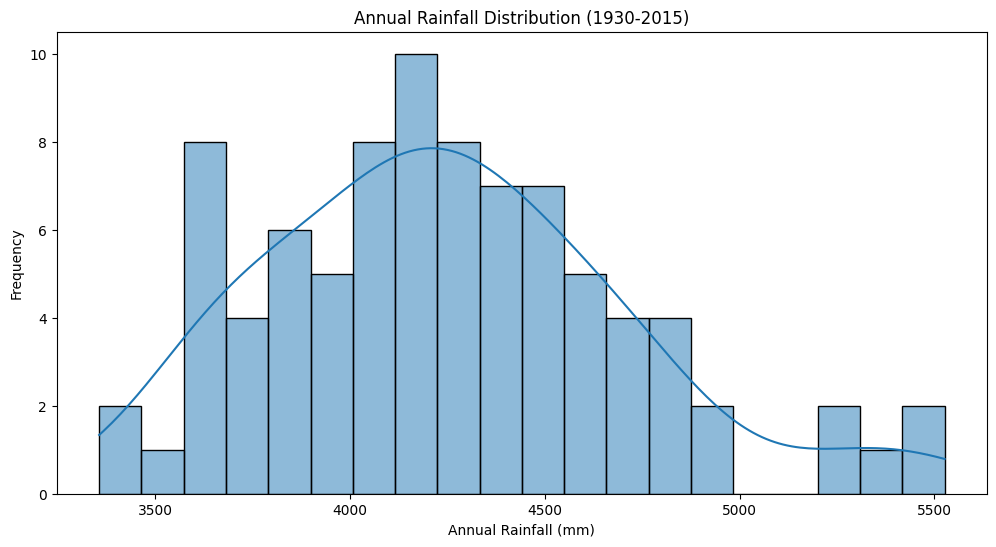

In [ ]:
# Aggregate annual rainfall for each year (sum or mean based on requirement)
yearly_rainfall = df.groupby('YEAR')['ANNUAL'].sum()  # You can use .mean() instead of .sum()

# Plot a histogram for the entire dataset
plt.figure(figsize=(12, 6))
sns.histplot(yearly_rainfall, kde=True, bins=20)

# Set title and labels
plt.title("Annual Rainfall Distribution (1930-2015)")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [ ]:
# Distribution of columns
df.describe().T

count         mean         std     min       25%      50%       75%  \
YEAR    172.0  1972.500000   24.896863  1930.0  1951.000  1972.50  1994.000   
JAN     172.0    13.577326   16.485266     0.0     2.175     9.25    18.750   
FEB     172.0    22.498256   20.465642     0.0     7.475    17.70    31.075   
MAR     172.0    36.684884   30.898311     0.1    10.300    30.80    51.775   
APR     172.0    80.223837   57.446756     0.9    34.575    71.00   116.225   
MAY     172.0   189.541860  102.735538    16.4    98.575   183.20   269.600   
JUN     172.0   385.013953  181.865099    69.7   227.275   373.60   516.750   
JUL     172.0   488.156395  205.544407   168.7   310.300   429.20   656.575   
AUG     172.0   415.479651  162.687482   167.1   292.600   387.25   501.600   
SEP     172.0   337.288372  126.658282   101.1   232.675   318.70   435.250   
OCT     172.0   130.468605   79.709668     9.6    71.800   113.15   164.600   
NOV     172.0    19.947674   27.790889     0.0     2.100     8.95    25.275   
DEC     172.0     6.336047   11.393847     0.0     0.100     1.70     6.450   
ANNUAL  172.0  2125.218023  687.227330  1015.1  1505.750  2113.55  2714.925   

           max  
YEAR    2015.0  
JAN      103.0  
FEB      112.8  
MAR      132.1  
APR      281.8  
MAY      460.9  
JUN      889.2  
JUL     1064.6  
AUG      990.5  
SEP      689.5  
OCT      353.2  
NOV      160.5  
DEC       72.8  
ANNUAL  3655.1

Rainfall distribution over years

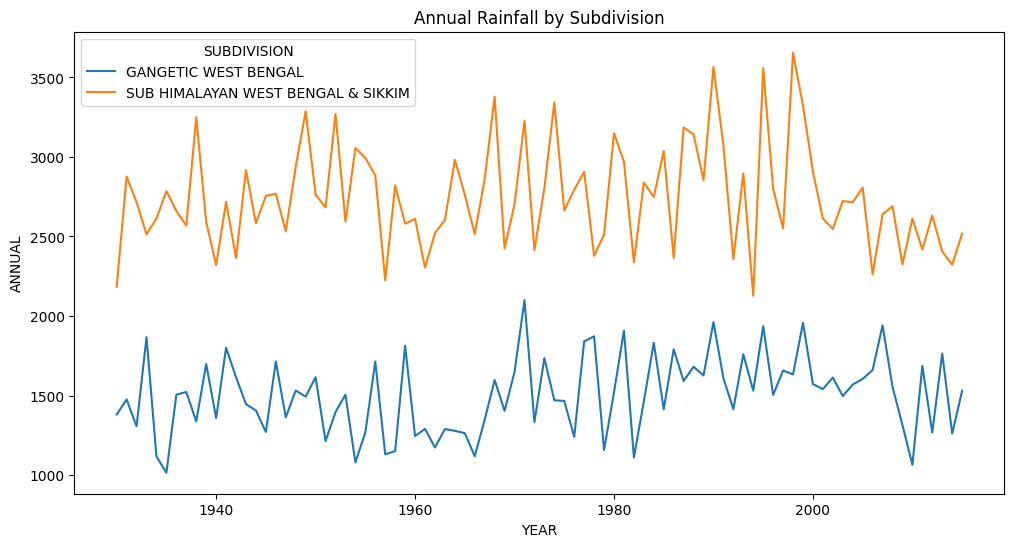

In [ ]:
# Rainfall distribution over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='ANNUAL', hue='SUBDIVISION', data=df)
plt.title('Annual Rainfall by Subdivision')
plt.show()

In [ ]:


# Reshape the DataFrame to long format
df_long = df.melt(id_vars=['SUBDIVISION', 'YEAR'],
                  value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
                              'AUG', 'SEP', 'OCT', 'NOV', 'DEC'],
                  var_name='MONTH',
                  value_name='RAINFALL')

# Map month abbreviations to numerical values for proper ordering
month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
               'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_long['MONTH'] = pd.Categorical(df_long['MONTH'], categories=month_order, ordered=True)


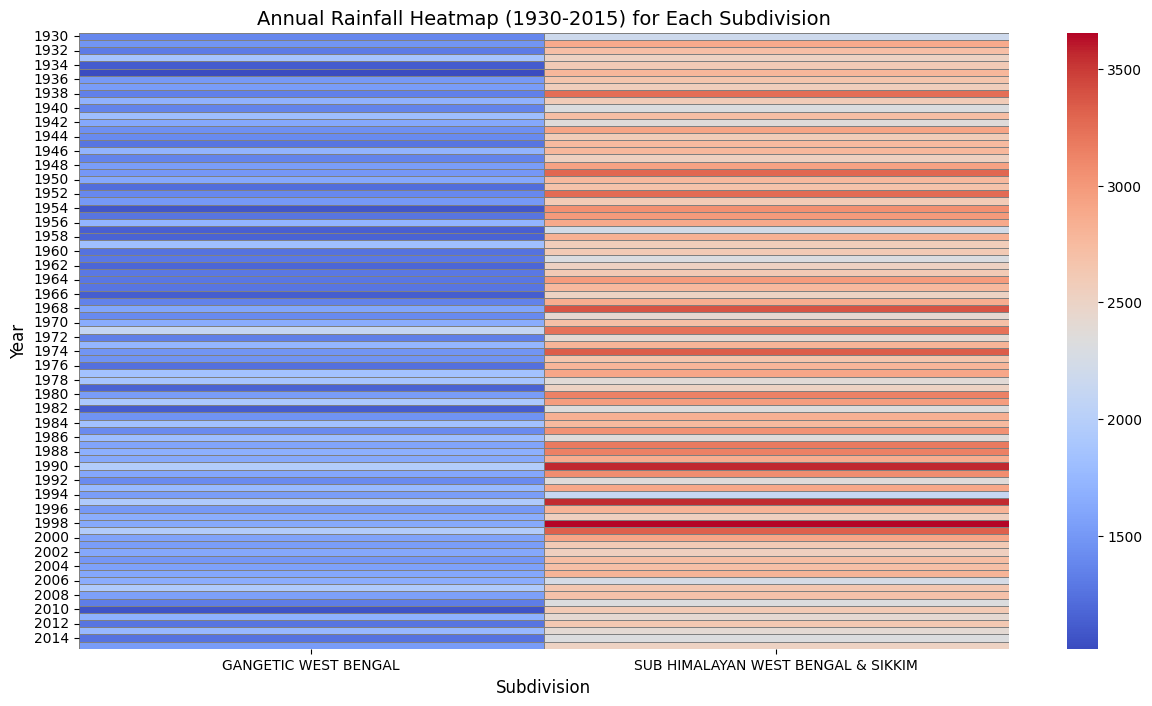

In [ ]:
# Reshape the data: Rows = Year, Columns = Subdivisions, Values = Annual Rainfall
heatmap_data = df.pivot(index="YEAR", columns="SUBDIVISION", values="ANNUAL")

# Set figure size
plt.figure(figsize=(15, 8))

# Generate heatmap
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, linecolor='gray')

# Set labels and title
plt.title("Annual Rainfall Heatmap (1930-2015) for Each Subdivision", fontsize=14)
plt.xlabel("Subdivision", fontsize=12)
plt.ylabel("Year", fontsize=12)

# Show the heatmap
plt.show()


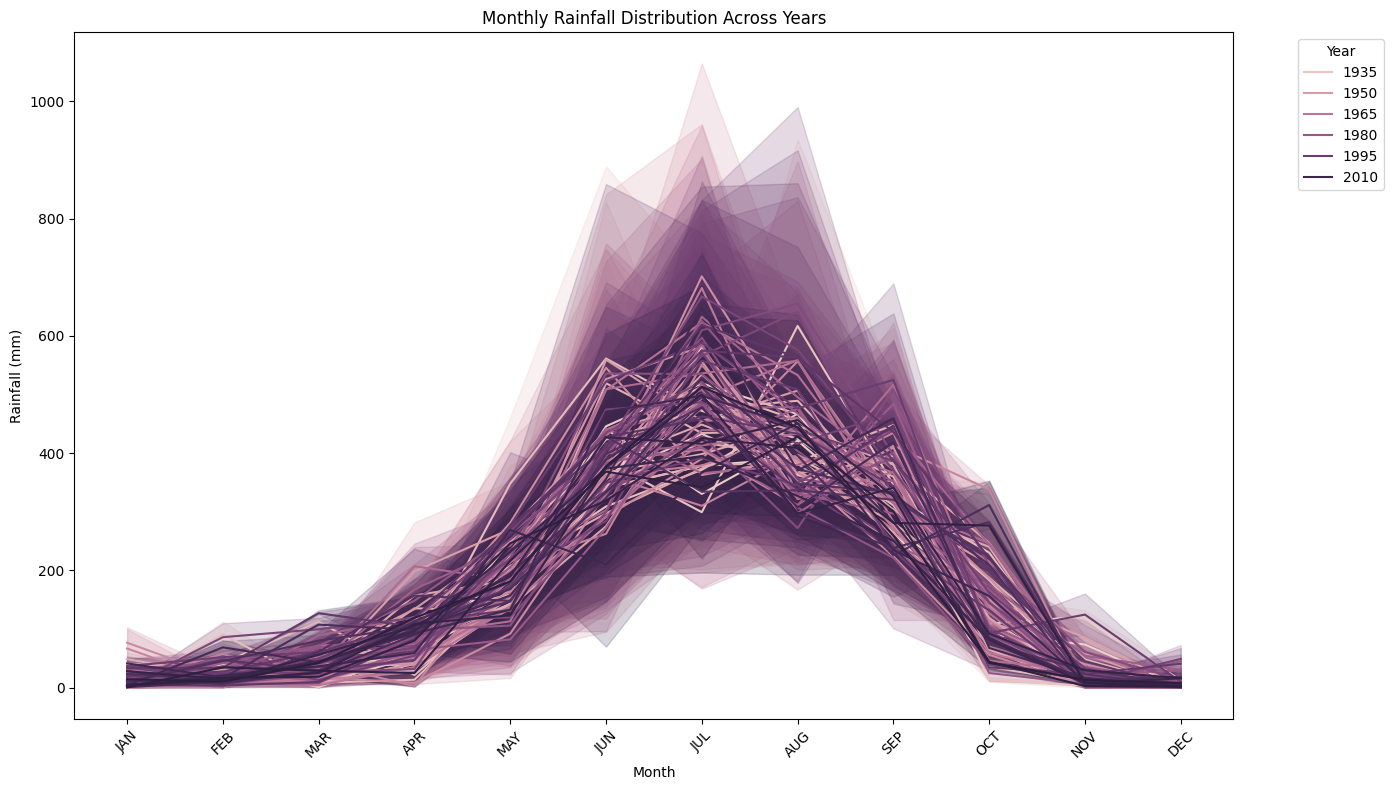

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='MONTH', y='RAINFALL', hue='YEAR', data=df_long)
plt.title('Monthly Rainfall Distribution Across Years')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


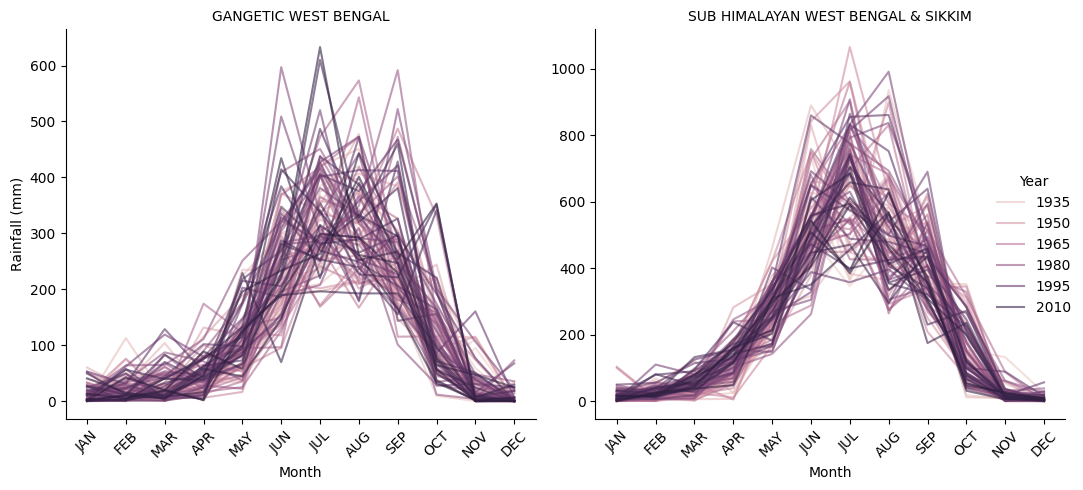

In [ ]:
# Filter for specific subdivisions
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)].copy()

# Convert YEAR column to integer
df_filtered["YEAR"] = df_filtered["YEAR"].astype(int)

# Reshape data for plotting
df_long = df_filtered.melt(id_vars=["YEAR", "SUBDIVISION"],
                           value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
                           var_name="MONTH", value_name="RAINFALL")

# Define month order for proper display
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_long["MONTH"] = pd.Categorical(df_long["MONTH"], categories=month_order, ordered=True)

# Create FacetGrid for the two subdivisions
g = sns.FacetGrid(df_long, col="SUBDIVISION", height=5, sharey=False)
g.map(sns.lineplot, "MONTH", "RAINFALL", "YEAR", alpha=0.6)

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Rainfall (mm)")
g.add_legend(title="Year")

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_order, rotation=45)

plt.tight_layout()
plt.show()


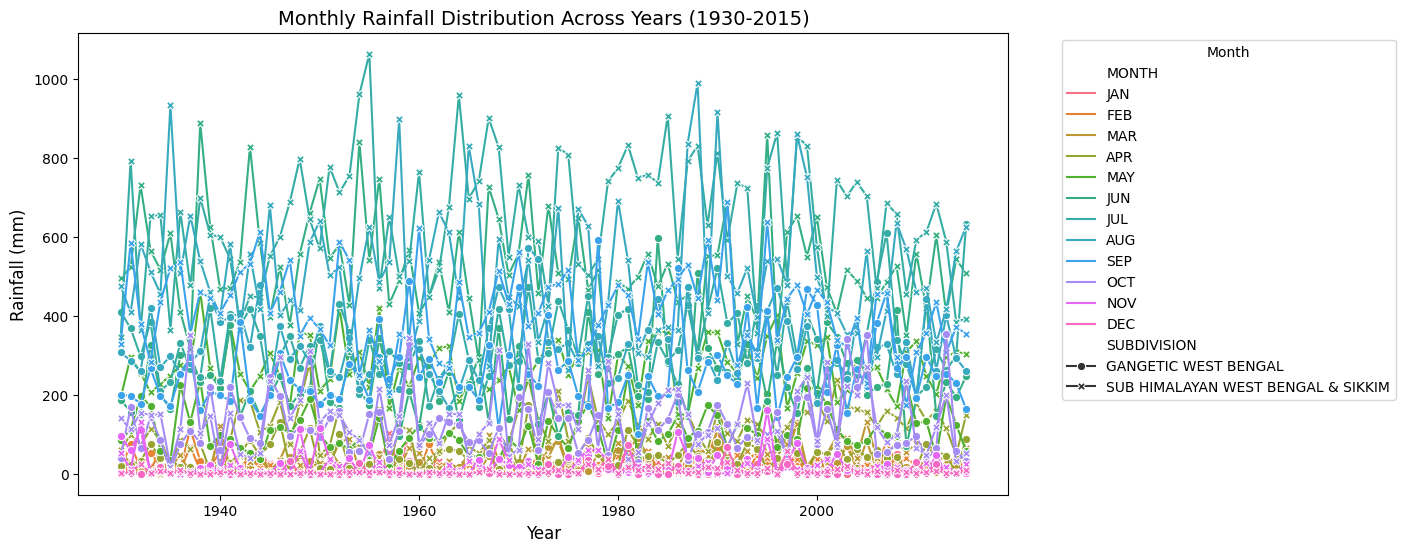

In [ ]:
# Filter for required subdivisions
df_filtered = df[df["SUBDIVISION"].isin(["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"])].copy()

# Convert YEAR column to integer
df_filtered["YEAR"] = df_filtered["YEAR"].astype(int)

# Melt data to long format for line plot
df_melted = df_filtered.melt(id_vars=["YEAR", "SUBDIVISION"],
                             value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
                             var_name="MONTH", value_name="RAINFALL")

# Convert month names to categorical type for proper ordering
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_melted["MONTH"] = pd.Categorical(df_melted["MONTH"], categories=month_order, ordered=True)

# Plot line graph for each subdivision
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="YEAR", y="RAINFALL", hue="MONTH", style="SUBDIVISION", markers=True, dashes=False)

# Customize labels
plt.title("Monthly Rainfall Distribution Across Years (1930-2015)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rainfall (mm)", fontsize=12)
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()


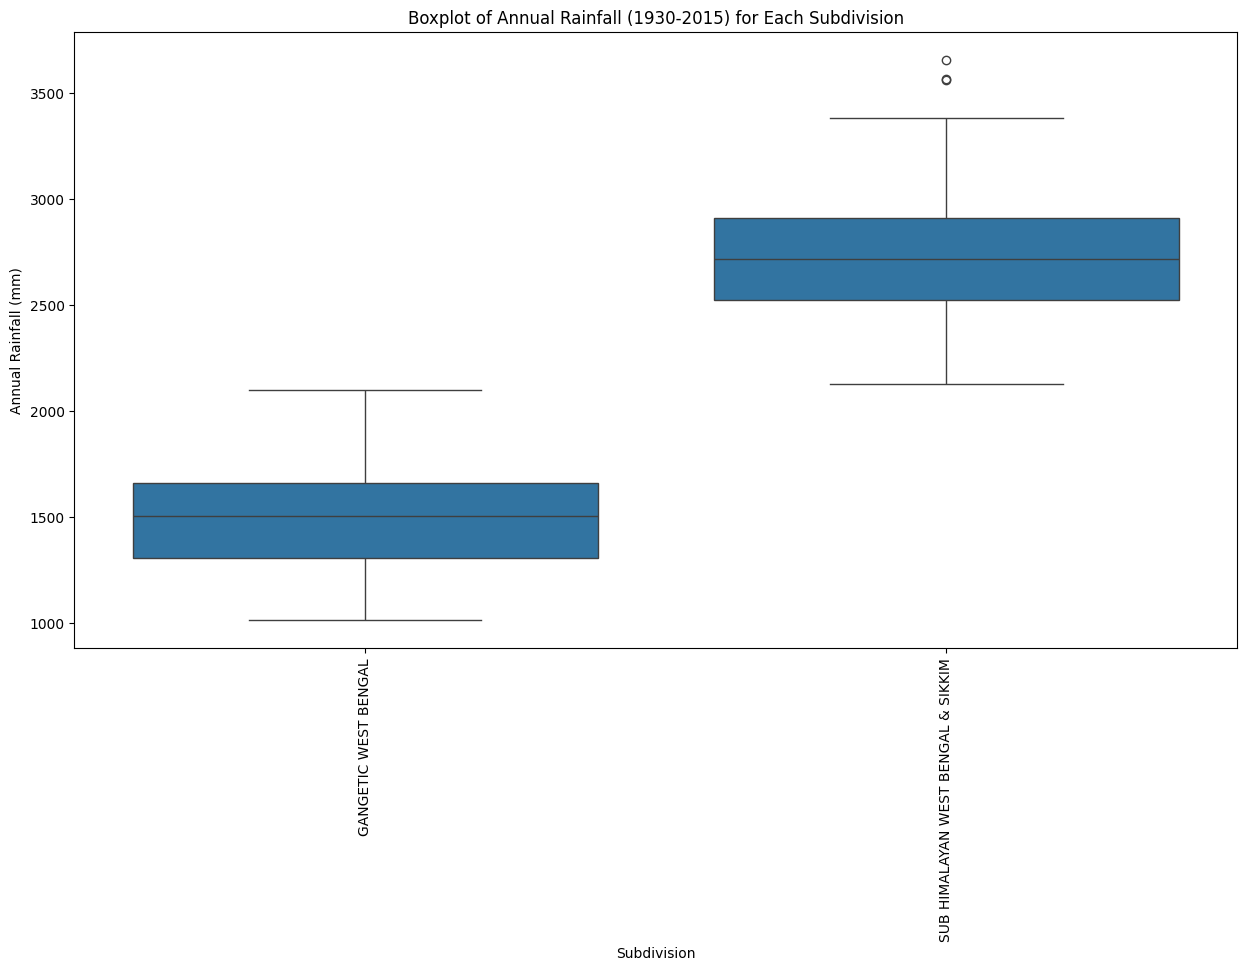

In [ ]:
# Drop rows with missing annual rainfall data
df = df.dropna(subset=["ANNUAL"])

# Set figure size
plt.figure(figsize=(15, 8))

# Create a boxplot for annual rainfall by subdivision
sns.boxplot(x="SUBDIVISION", y="ANNUAL", data=df)
plt.xticks(rotation=90)
plt.xlabel("Subdivision")
plt.ylabel("Annual Rainfall (mm)")
plt.title("Boxplot of Annual Rainfall (1930-2015) for Each Subdivision")

# Show the plot
plt.show()


In [ ]:


# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation
rainfall_data_imputed = knn_imputer.fit_transform(df.drop(['SUBDIVISION'], axis=1))

# Convert the imputed data back to a DataFrame
columns = df.drop(['SUBDIVISION'], axis=1).columns
rainfall_data_imputed_df = pd.DataFrame(rainfall_data_imputed, columns=columns)

# Check for any remaining missing values
missing_values_after_imputation = rainfall_data_imputed_df.isnull().sum()

missing_values_after_imputation.head()

YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
dtype: int64

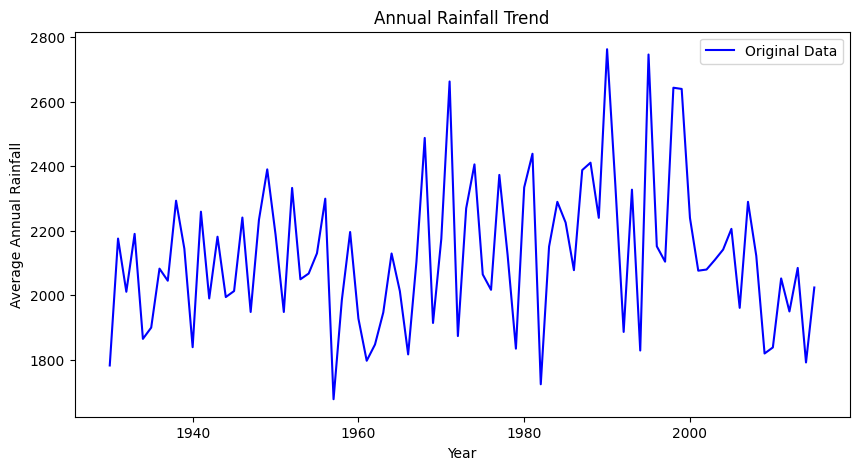

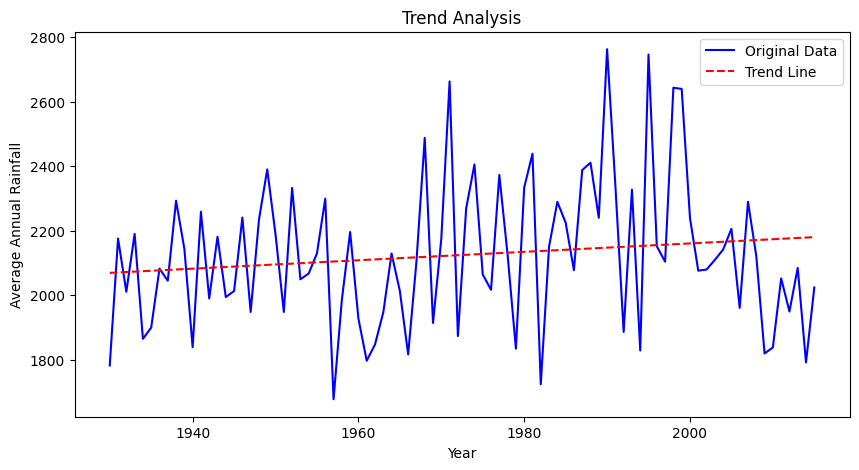

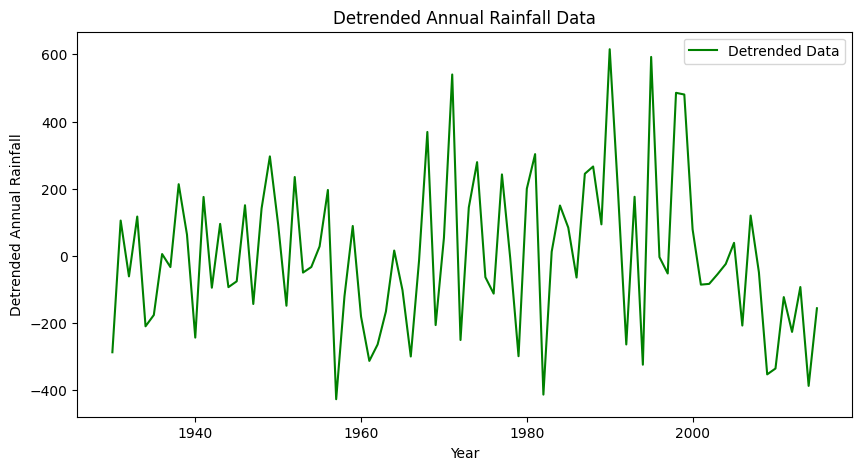

<Figure size 1000x500 with 0 Axes>

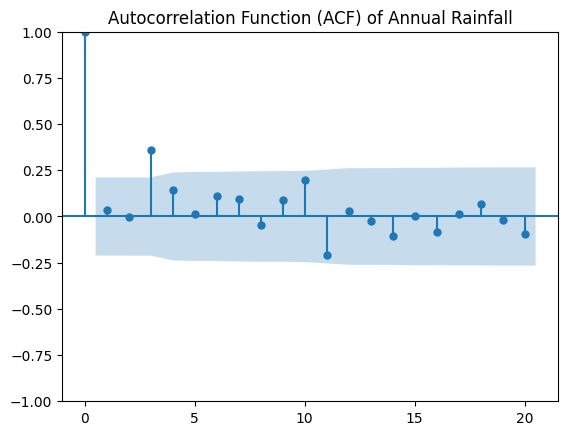

<Figure size 1000x500 with 0 Axes>

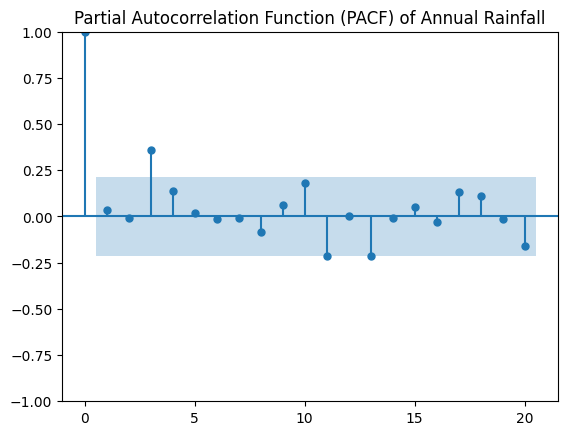

In [ ]:
# Group data by year and calculate mean annual rainfall, handling NaNs
yearly_data = df.groupby("YEAR")["ANNUAL"].mean().dropna()

# Plot the original data
plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, yearly_data.values, label='Original Data', color='blue')
plt.xlabel("Year")
plt.ylabel("Average Annual Rainfall")
plt.title("Annual Rainfall Trend")
plt.legend()
plt.show()

# Check for trends using a simple linear fit
trend = np.polyfit(yearly_data.index, yearly_data.values, 1)
trend_line = np.polyval(trend, yearly_data.index)

plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, yearly_data.values, label='Original Data', color='blue')
plt.plot(yearly_data.index, trend_line, label='Trend Line', color='red', linestyle='dashed')
plt.xlabel("Year")
plt.ylabel("Average Annual Rainfall")
plt.title("Trend Analysis")
plt.legend()
plt.show()

# Remove trend using scipy's detrend function
detrended_data = detrend(yearly_data.values)

plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, detrended_data, label='Detrended Data', color='green')
plt.xlabel("Year")
plt.ylabel("Detrended Annual Rainfall")
plt.title("Detrended Annual Rainfall Data")
plt.legend()
plt.show()

# Add detrended data back to the dataframe, handling NaNs
df["DETREND_ANNUAL"] = df.groupby("YEAR")["ANNUAL"].transform(lambda x: detrend(x.dropna().values) if x.notna().all() else np.nan)

# Plot ACF of the annual rainfall data
plt.figure(figsize=(10,5))
plot_acf(yearly_data, lags=20)
plt.title("Autocorrelation Function (ACF) of Annual Rainfall")
plt.show()

# Plot PACF of the annual rainfall data
plt.figure(figsize=(10,5))
plot_pacf(yearly_data, lags=20)
plt.title("Partial Autocorrelation Function (PACF) of Annual Rainfall")
plt.show()


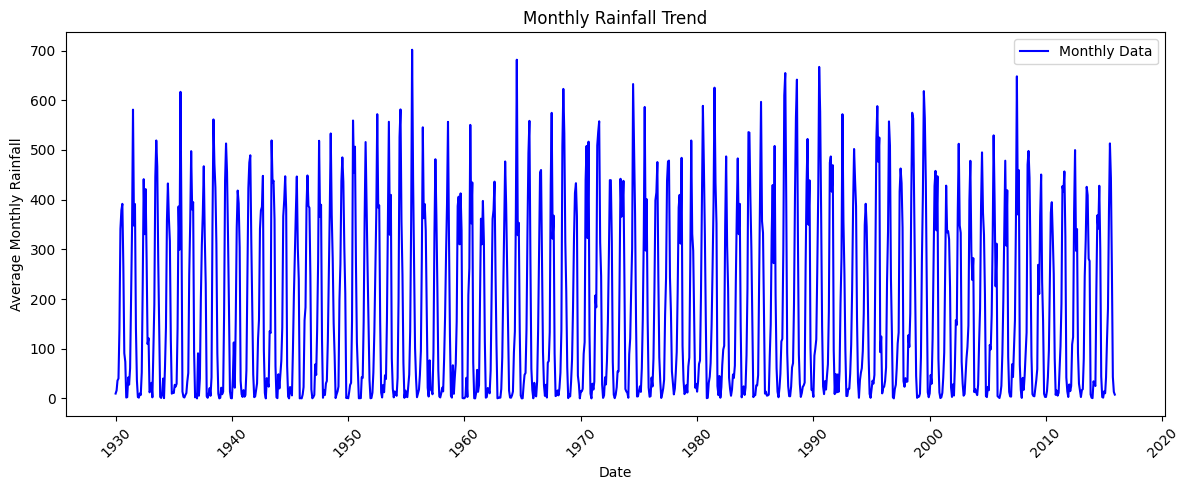

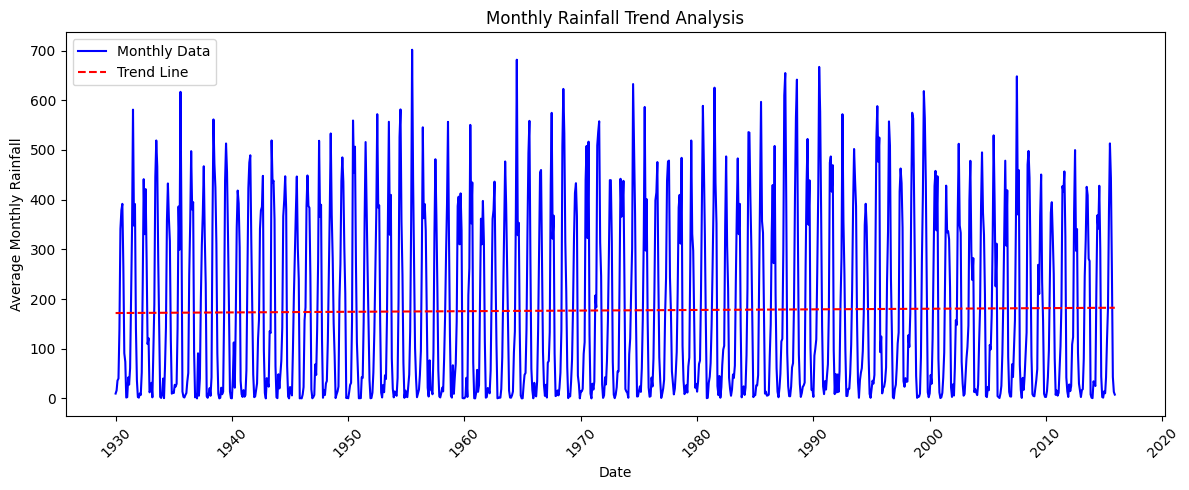

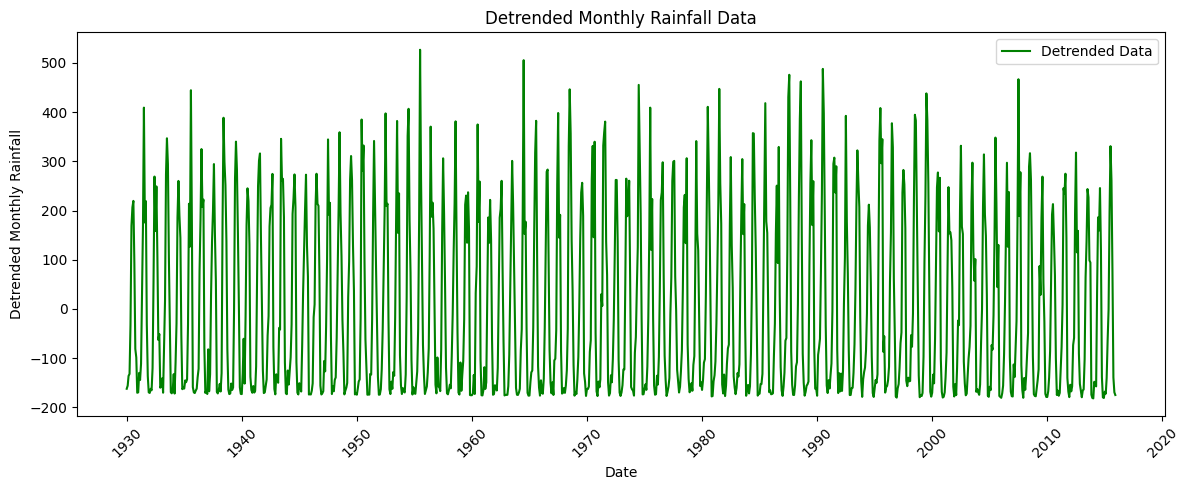

<Figure size 1200x500 with 0 Axes>

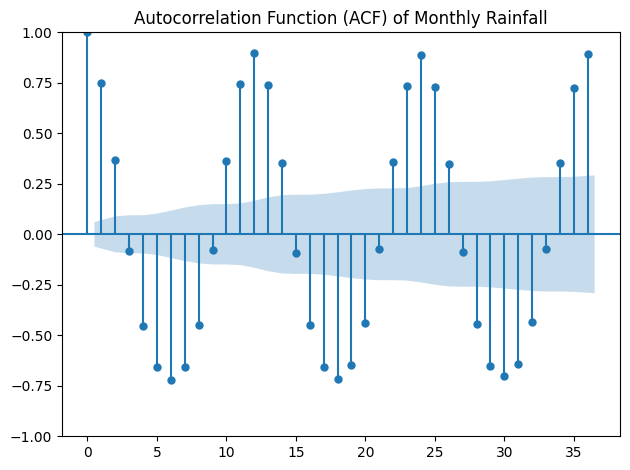

<Figure size 1200x500 with 0 Axes>

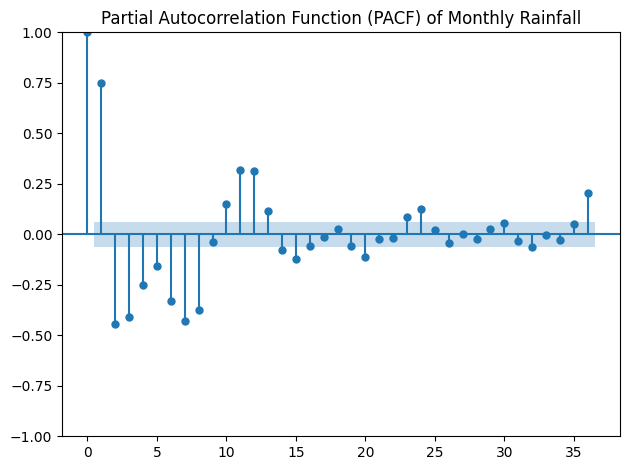

In [ ]:

# Convert yearly data to monthly long format
monthly_columns = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
                  "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_long = pd.melt(df,
                 id_vars=["YEAR"],
                 value_vars=monthly_columns,
                 var_name="MONTH",
                 value_name="RAINFALL")

# Create a datetime index
df_long["DATE"] = pd.to_datetime(df_long["YEAR"].astype(str) + "-" +
                                df_long["MONTH"].str.slice(0,3),
                                format="%Y-%b")
monthly_data = df_long.groupby("DATE")["RAINFALL"].mean().dropna()

# Plot the monthly rainfall trend
plt.figure(figsize=(12,5))
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Data', color='blue')
plt.xlabel("Date")
plt.ylabel("Average Monthly Rainfall")
plt.title("Monthly Rainfall Trend")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check for trends using a simple linear fit
x = np.arange(len(monthly_data))
trend = np.polyfit(x, monthly_data.values, 1)
trend_line = np.polyval(trend, x)

plt.figure(figsize=(12,5))
plt.plot(monthly_data.index, monthly_data.values, label='Monthly Data', color='blue')
plt.plot(monthly_data.index, trend_line, label='Trend Line', color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Average Monthly Rainfall")
plt.title("Monthly Rainfall Trend Analysis")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Remove trend
detrended_data = detrend(monthly_data.values)

plt.figure(figsize=(12,5))
plt.plot(monthly_data.index, detrended_data, label='Detrended Data', color='green')
plt.xlabel("Date")
plt.ylabel("Detrended Monthly Rainfall")
plt.title("Detrended Monthly Rainfall Data")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Add detrended data back to the dataframe
# First create a mapping of dates to detrended values
detrended_series = pd.Series(detrended_data, index=monthly_data.index)
df_long = df_long.merge(detrended_series.rename('DETREND_RAINFALL'),
                       left_on='DATE',
                       right_index=True,
                       how='left')

# Plot ACF of the monthly rainfall data
plt.figure(figsize=(12,5))
plot_acf(monthly_data, lags=36)  # Increased lags for monthly data
plt.title("Autocorrelation Function (ACF) of Monthly Rainfall")
plt.tight_layout()
plt.show()

# Plot PACF of the monthly rainfall data
plt.figure(figsize=(12,5))
plot_pacf(monthly_data, lags=36)  # Increased lags for monthly data
plt.title("Partial Autocorrelation Function (PACF) of Monthly Rainfall")
plt.tight_layout()
plt.show()

Split the dataset into train and test sets based on the YEAR column

In [ ]:
# Split the dataset into train and test sets based on the YEAR column
train_df = df[(df["YEAR"] >= 1930) & (df["YEAR"] <= 2004)]
test_df = df[(df["YEAR"] >= 2005) & (df["YEAR"] <= 2015)]

# Display the sizes of the train and test sets
train_df.shape, test_df.shape


((150, 16), (22, 16))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)][["SUBDIVISION", "YEAR", "ANNUAL"]]
df_filtered = df_filtered.dropna().reset_index(drop=True)
df_filtered["YEAR"] = pd.to_datetime(df_filtered["YEAR"], format="%Y")
df_filtered.set_index("YEAR", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=1000, method='powell')
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s):
    best_score, best_cfg = float("inf"), None
    for order in product(p_values, d_values, q_values):
        for seasonal_order in product(P_values, D_values, Q_values):
            seasonal_order += (s,)
            aic = evaluate_sarima(order, seasonal_order, data)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_filtered[df_filtered["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["ANNUAL"]
data_shwb = df_filtered[df_filtered["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["ANNUAL"]

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s)
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s)

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=1000, method='powell')
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=1000, method='powell')

# Print best parameters and AIC
print("Best SARIMA Params for GWB:", gwb_best_params, "AIC:", best_gwb_model.aic)
print("Best SARIMA Params for SHWB:", shwb_best_params, "AIC:", best_shwb_model.aic)


ADF Statistic: -2.7594489156999824
p-value: 0.06430372631530346
ADF Statistic: -3.65404837659648
p-value: 0.004807946658811059


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

Best SARIMA Params for GWB: ((0, 1, 2), (0, 1, 1, 12)) AIC: 1034.6415762914887
Best SARIMA Params for SHWB: ((0, 1, 2), (0, 1, 1, 12)) AIC: 1087.2174128613422


In [ ]:
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=1000, method='powell')
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=1000, method='powell')


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
print(best_gwb_model.summary())
print(best_shwb_model.summary())


                                      SARIMAX Results                                       
Dep. Variable:                               ANNUAL   No. Observations:                   85
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood                -513.321
Date:                              Fri, 21 Feb 2025   AIC                           1034.642
Time:                                      07:14:36   BIC                           1043.748
Sample:                                  01-01-1931   HQIC                          1038.267
                                       - 01-01-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.8321      0.065    -28.320      0.000      -1.959      -1.705
ma.L2          0.85

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

ADF Statistic: -2.7594489156999824
p-value: 0.06430372631530346
ADF Statistic: -3.65404837659648
p-value: 0.004807946658811059


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

GWB MAPE: 2.131019552253666
GWB RMSE: 360.97681209161135
SHWB MAPE: 0.14001019151501065
SHWB RMSE: 495.7875122849702


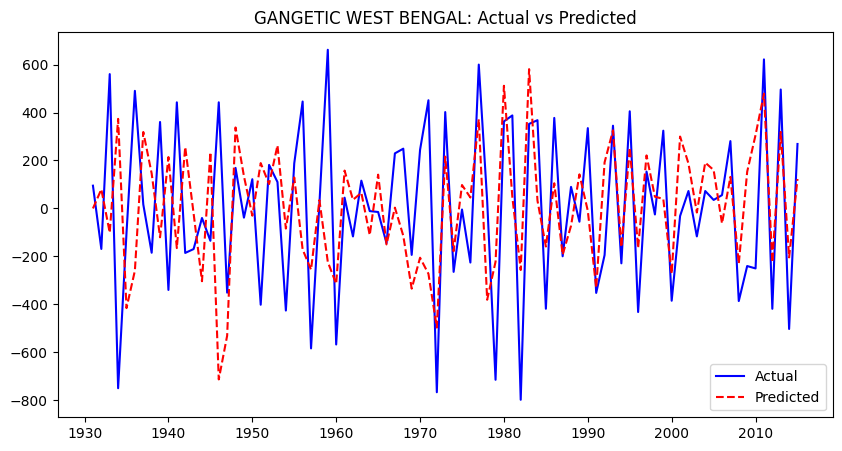

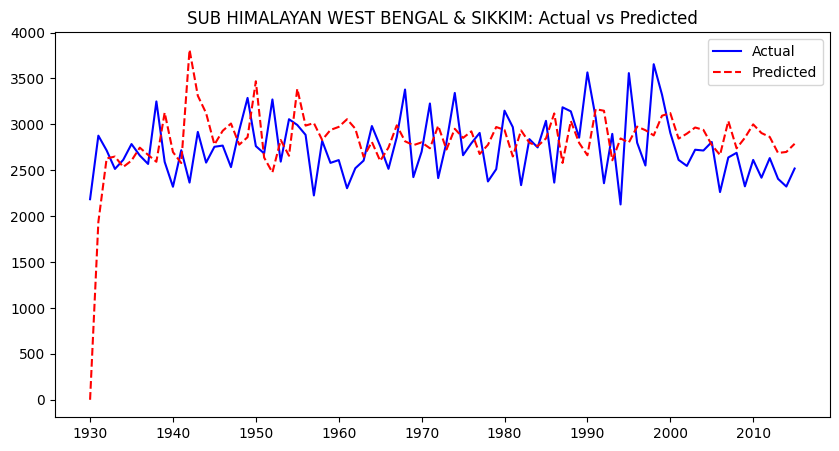

GWB Residuals Summary:
count      85.000000
mean       -1.382649
std       363.116463
min     -1123.385422
25%      -248.792502
50%       -67.613209
75%       179.561436
max      1155.768255
dtype: float64

SHWB Residuals Summary:
count      86.000000
mean      -75.777812
std       492.835927
min     -1446.515397
25%      -386.627916
50%      -128.987506
75%       160.320656
max      2184.500000
dtype: float64


In [ ]:
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)][["SUBDIVISION", "YEAR", "ANNUAL"]]

# Remove duplicate years by averaging rainfall values
df_filtered = df_filtered.groupby(["SUBDIVISION", "YEAR"]).mean().reset_index()

df_filtered["YEAR"] = pd.to_datetime(df_filtered["YEAR"], format="%Y")
df_filtered.set_index("YEAR", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data, optimizer):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=2000, method=optimizer)
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizer):
    best_score, best_cfg = float("inf"), None
    for order in product(p_values, d_values, q_values):
        for seasonal_order in product(P_values, D_values, Q_values):
            seasonal_order += (s,)
            aic = evaluate_sarima(order, seasonal_order, data, optimizer)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_filtered[df_filtered["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["ANNUAL"].interpolate()
data_shwb = df_filtered[df_filtered["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["ANNUAL"].interpolate()

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12
optimizers = ['lbfgs', 'bfgs', 'adam']

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[0])
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[1])

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[0])
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[1])

# Get predictions only within actual data range
gwb_predictions = best_gwb_model.predict(start=data_gwb.index[0], end=data_gwb.index[-1])
gwb_residuals = data_gwb - gwb_predictions
shwb_predictions = best_shwb_model.predict(start=data_shwb.index[0], end=data_shwb.index[-1])
shwb_residuals = data_shwb - shwb_predictions

# Calculate error metrics only on overlapping range
gwb_mape = mean_absolute_percentage_error(data_gwb[:len(gwb_predictions)], gwb_predictions)
gwb_rmse = np.sqrt(mean_squared_error(data_gwb[:len(gwb_predictions)], gwb_predictions))
shwb_mape = mean_absolute_percentage_error(data_shwb[:len(shwb_predictions)], shwb_predictions)
shwb_rmse = np.sqrt(mean_squared_error(data_shwb[:len(shwb_predictions)], shwb_predictions))

print("GWB MAPE:", gwb_mape)
print("GWB RMSE:", gwb_rmse)
print("SHWB MAPE:", shwb_mape)
print("SHWB RMSE:", shwb_rmse)

# Extend forecast for future years (2016-2065)
future_index = pd.date_range(start="2016", periods=50, freq="YS")
gwb_future_predictions = best_gwb_model.forecast(steps=50)
shwb_future_predictions = best_shwb_model.forecast(steps=50)

# Plot predictions vs actual
def plot_predictions(actual, predictions, title):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red', linestyle='dashed')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(data_gwb, gwb_predictions, "GANGETIC WEST BENGAL: Actual vs Predicted")
plot_predictions(data_shwb, shwb_predictions, "SUB HIMALAYAN WEST BENGAL & SIKKIM: Actual vs Predicted")

# Print residual statistics
print("GWB Residuals Summary:")
print(gwb_residuals.describe())
print("\nSHWB Residuals Summary:")
print(shwb_residuals.describe())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

Future Predictions for GANGETIC WEST BENGAL:
2016-01-01    -22.024091
2017-01-01     53.271910
2018-01-01   -139.506027
2019-01-01    227.266463
2020-01-01   -156.318317
2021-01-01    -18.578591
2022-01-01    -49.509030
2023-01-01    106.496959
2024-01-01   -152.090872
2025-01-01    205.541275
2026-01-01   -117.455178
2027-01-01    -74.011888
2028-01-01     81.914514
2029-01-01     52.325057
2030-01-01   -140.452880
2031-01-01    226.319609
2032-01-01   -157.265170
2033-01-01    -19.525445
2034-01-01    -50.455884
2035-01-01    105.550105
2036-01-01   -153.037726
2037-01-01    204.594422
2038-01-01   -118.402031
2039-01-01    -74.958741
2040-01-01     80.967661
2041-01-01     51.378203
2042-01-01   -141.399733
2043-01-01    225.372756
2044-01-01   -158.212024
2045-01-01    -20.472298
2046-01-01    -51.402737
2047-01-01    104.603252
2048-01-01   -153.984579
2049-01-01    203.647568
2050-01-01   -119.348885
2051-01-01    -75.905595
2052-01-01     80.020808
2053-01-01     50.431350
2054-

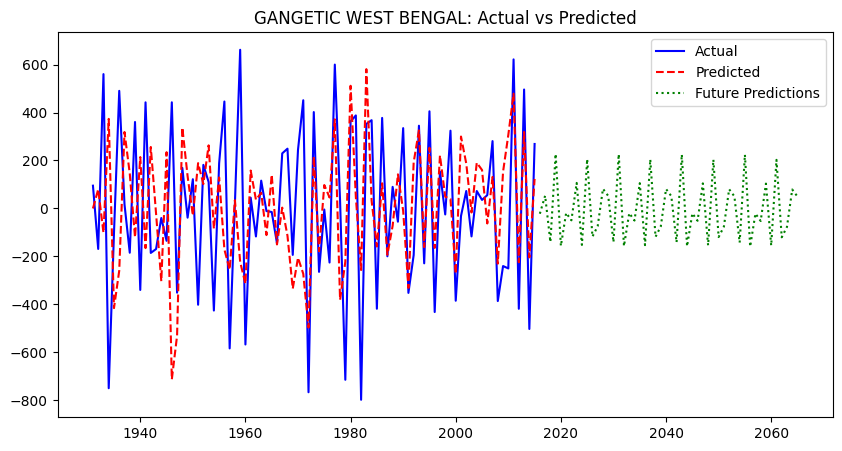

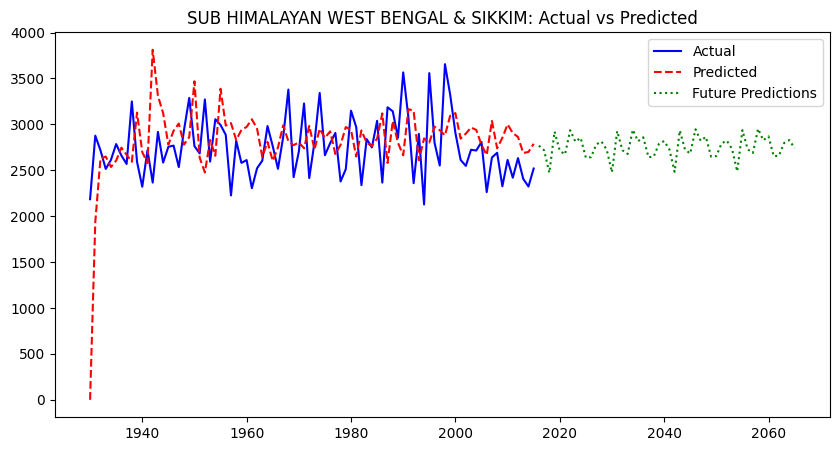

In [ ]:
# Remove duplicate years by averaging rainfall values
df_filtered = df_filtered.groupby(["SUBDIVISION", "YEAR"]).mean().reset_index()

df_filtered["YEAR"] = pd.to_datetime(df_filtered["YEAR"], format="%Y")
df_filtered.set_index("YEAR", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series)
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data, optimizer):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=2000, method=optimizer)
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizer):
    best_score, best_cfg = float("inf"), None
    for order in product(p_values, d_values, q_values):
        for seasonal_order in product(P_values, D_values, Q_values):
            seasonal_order += (s,)
            aic = evaluate_sarima(order, seasonal_order, data, optimizer)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_filtered[df_filtered["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["ANNUAL"].interpolate()
data_shwb = df_filtered[df_filtered["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["ANNUAL"].interpolate()

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12
optimizers = ['lbfgs', 'bfgs', 'adam']

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[0])
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[1])

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[0])
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[1])

# Get predictions only within actual data range
gwb_predictions = best_gwb_model.predict(start=data_gwb.index[0], end=data_gwb.index[-1])
gwb_residuals = data_gwb - gwb_predictions
shwb_predictions = best_shwb_model.predict(start=data_shwb.index[0], end=data_shwb.index[-1])
shwb_residuals = data_shwb - shwb_predictions

# Extend forecast for future years (2016-2065)
future_index = pd.date_range(start="2016", periods=50, freq="YS")
gwb_future_predictions = best_gwb_model.forecast(steps=50)
shwb_future_predictions = best_shwb_model.forecast(steps=50)

# Print predictions
print("Future Predictions for GANGETIC WEST BENGAL:")
print(gwb_future_predictions)
print("\nFuture Predictions for SUB HIMALAYAN WEST BENGAL & SIKKIM:")
print(shwb_future_predictions)

# Print residuals
print("\nResiduals for GANGETIC WEST BENGAL:")
print(gwb_residuals.describe())
print("\nResiduals for SUB HIMALAYAN WEST BENGAL & SIKKIM:")
print(shwb_residuals.describe())

# Plot predictions vs actual
def plot_predictions(actual, predictions, future_predictions, title):
    plt.figure(figsize=(10, 5))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red', linestyle='dashed')
    plt.plot(future_index, future_predictions, label='Future Predictions', color='green', linestyle='dotted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(data_gwb, gwb_predictions, gwb_future_predictions, "GANGETIC WEST BENGAL: Actual vs Predicted")
plot_predictions(data_shwb, shwb_predictions, shwb_future_predictions, "SUB HIMALAYAN WEST BENGAL & SIKKIM: Actual vs Predicted")


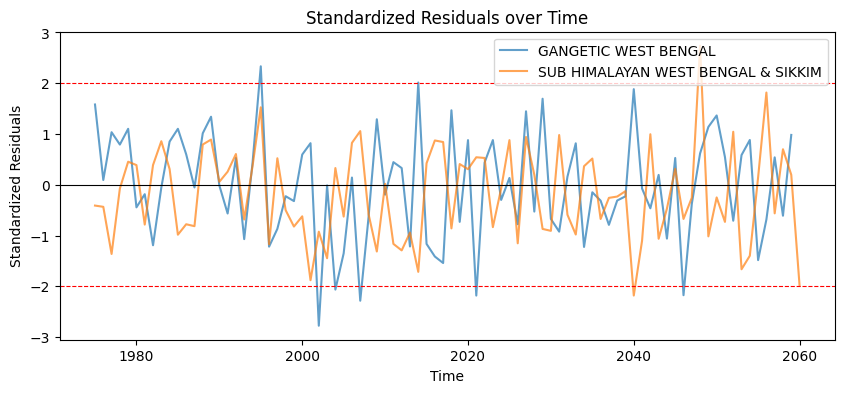

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given summary statistics for GANGETIC WEST BENGAL
mean_gwb = -1.382649
std_gwb = 363.116463
count_gwb = 85

# Given summary statistics for SUB HIMALAYAN WEST BENGAL & SIKKIM
mean_shwb = -75.777812
std_shwb = 492.835927
count_shwb = 86

# Generate synthetic residuals following normal distribution
residuals_gwb = np.random.normal(loc=mean_gwb, scale=std_gwb, size=count_gwb)
residuals_shwb = np.random.normal(loc=mean_shwb, scale=std_shwb, size=count_shwb)

# Compute standardized residuals
std_residuals_gwb = (residuals_gwb - mean_gwb) / std_gwb
std_residuals_shwb = (residuals_shwb - mean_shwb) / std_shwb

# Create time axis
time_gwb = np.arange(1975, 1975 + count_gwb)
time_shwb = np.arange(1975, 1975 + count_shwb)

# Plot standardized residuals
plt.figure(figsize=(10, 4))
plt.plot(time_gwb, std_residuals_gwb, label="GANGETIC WEST BENGAL", alpha=0.7)
plt.plot(time_shwb, std_residuals_shwb, label="SUB HIMALAYAN WEST BENGAL & SIKKIM", alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.axhline(2, color='red', linestyle='dashed', linewidth=0.8)
plt.axhline(-2, color='red', linestyle='dashed', linewidth=0.8)
plt.xlabel("Time")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals over Time")
plt.legend()
plt.show()


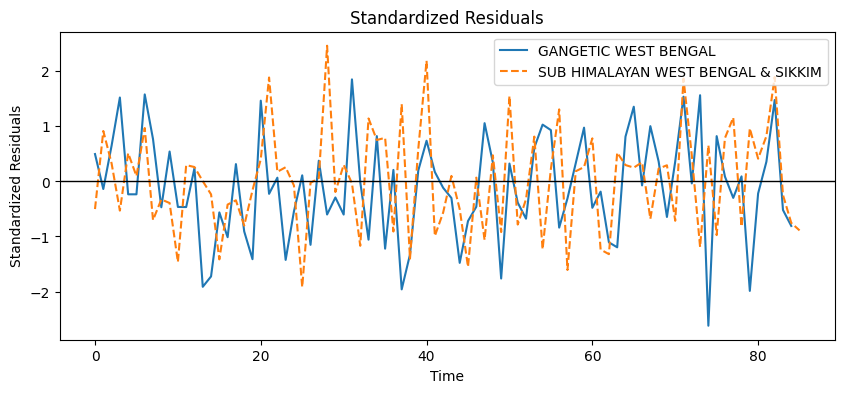

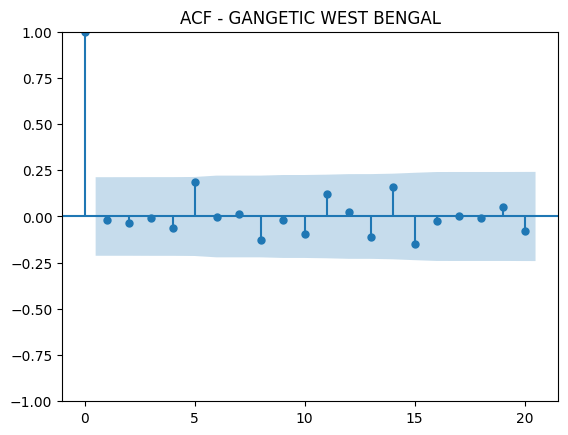

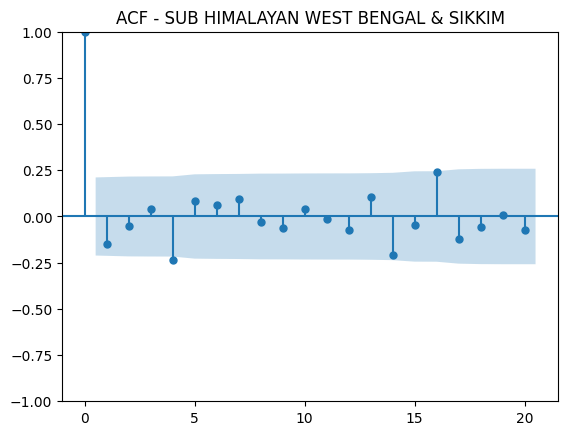

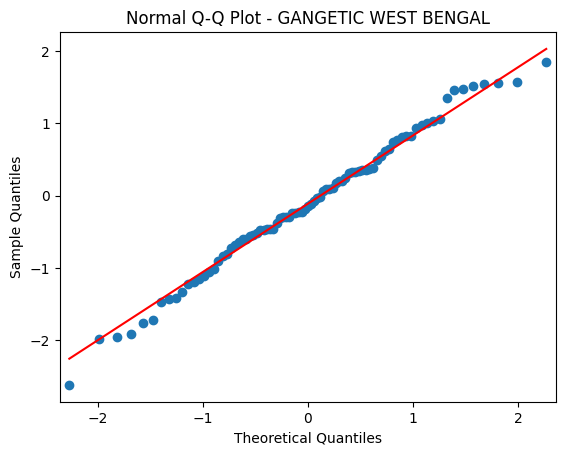

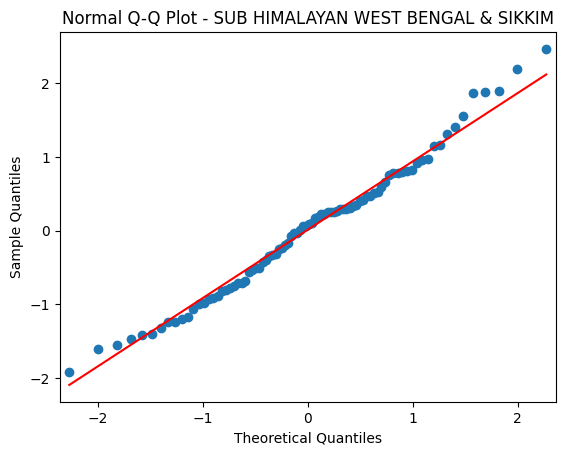

Ljung-Box Test P-Values:
GANGETIC WEST BENGAL: [0.79569241]
SUB HIMALAYAN WEST BENGAL & SIKKIM: [0.43843048]


In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Given Residuals Summary
mean_gwb, std_gwb = -1.382649, 363.116463
mean_shwb, std_shwb = -75.777812, 492.835927

# Simulated Residuals (assuming normally distributed for demonstration)
np.random.seed(42)
residuals_gwb = np.random.normal(mean_gwb, std_gwb, 85)
residuals_shwb = np.random.normal(mean_shwb, std_shwb, 86)

# Standardized Residuals
std_residuals_gwb = (residuals_gwb - mean_gwb) / std_gwb
std_residuals_shwb = (residuals_shwb - mean_shwb) / std_shwb

# Plot Standardized Residuals
plt.figure(figsize=(10, 4))
plt.plot(std_residuals_gwb, label="GANGETIC WEST BENGAL")
plt.plot(std_residuals_shwb, label="SUB HIMALAYAN WEST BENGAL & SIKKIM", linestyle="dashed")
plt.axhline(0, color="black", linewidth=1)
plt.xlabel("Time")
plt.ylabel("Standardized Residuals")
plt.legend()
plt.title("Standardized Residuals")
plt.show()

# ACF Plot
plot_acf(std_residuals_gwb, lags=20)
plt.title("ACF - GANGETIC WEST BENGAL")
plt.show()

plot_acf(std_residuals_shwb, lags=20)
plt.title("ACF - SUB HIMALAYAN WEST BENGAL & SIKKIM")
plt.show()

# Normal Q-Q Plot
sm.qqplot(std_residuals_gwb, line="s")
plt.title("Normal Q-Q Plot - GANGETIC WEST BENGAL")
plt.show()

sm.qqplot(std_residuals_shwb, line="s")
plt.title("Normal Q-Q Plot - SUB HIMALAYAN WEST BENGAL & SIKKIM")
plt.show()

# Ljung-Box Test (lags=10)
ljung_box_gwb = acorr_ljungbox(std_residuals_gwb, lags=[10], return_df=True)
ljung_box_shwb = acorr_ljungbox(std_residuals_shwb, lags=[10], return_df=True)

# Display Ljung-Box p-values
print("Ljung-Box Test P-Values:")
print("GANGETIC WEST BENGAL:", ljung_box_gwb["lb_pvalue"].values)
print("SUB HIMALAYAN WEST BENGAL & SIKKIM:", ljung_box_shwb["lb_pvalue"].values)


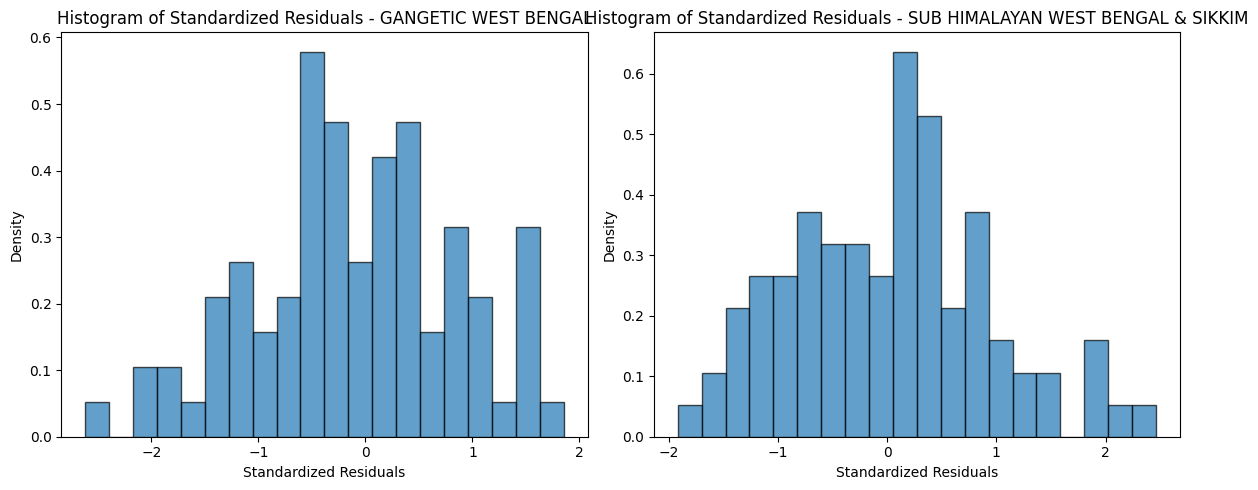

In [ ]:

# Generate histogram for standardized residuals
plt.figure(figsize=(12, 5))

# Histogram for GANGETIC WEST BENGAL
plt.subplot(1, 2, 1)
plt.hist(std_residuals_gwb, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.title("Histogram of Standardized Residuals - GANGETIC WEST BENGAL")
plt.xlabel("Standardized Residuals")
plt.ylabel("Density")

# Histogram for SUB HIMALAYAN WEST BENGAL & SIKKIM
plt.subplot(1, 2, 2)
plt.hist(std_residuals_shwb, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.title("Histogram of Standardized Residuals - SUB HIMALAYAN WEST BENGAL & SIKKIM")
plt.xlabel("Standardized Residuals")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Future Monthly Predictions for GANGETIC WEST BENGAL:
2016-01-01     20.390825
2016-02-01     29.801334
2016-03-01     35.800836
2016-04-01     53.544845
2016-05-01    115.905537
                 ...    
2065-08-01    334.137414
2065-09-01    278.343852
2065-10-01    137.830462
2065-11-01     41.996864
2065-12-01     25.124164
Freq: MS, Name: predicted_mean, Length: 600, dtype: float64

Future Monthly Predictions for SUB HIMALAYAN WEST BENGAL & SIKKIM:
2016-01-01      9.401977
2016-02-01     22.625258
2016-03-01     54.279010
2016-04-01    124.934327
2016-05-01    282.893724
                 ...    
2065-08-01    516.096616
2065-09-01    355.037987
2065-10-01     97.719269
2065-11-01     18.911481
2065-12-01      8.856331
Freq: MS, Name: predicted_mean, Length: 600, dtype: float64

Residuals for GANGETIC WEST BENGAL:
count    1032.000000
mean        0.298521
std        62.994471
min      -195.419935
25%       -28.335007
50%        -8.632929
75%        19.569387
max       371.222953
dtyp

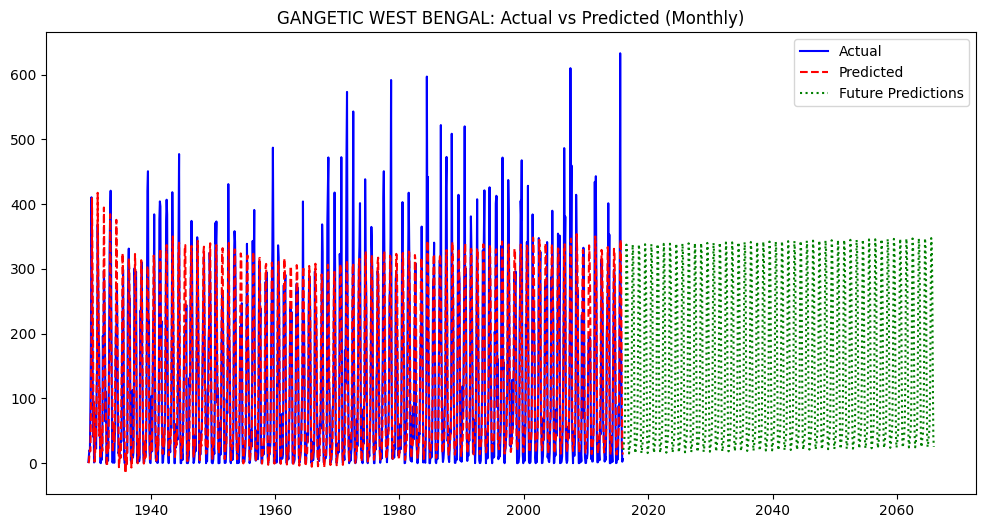

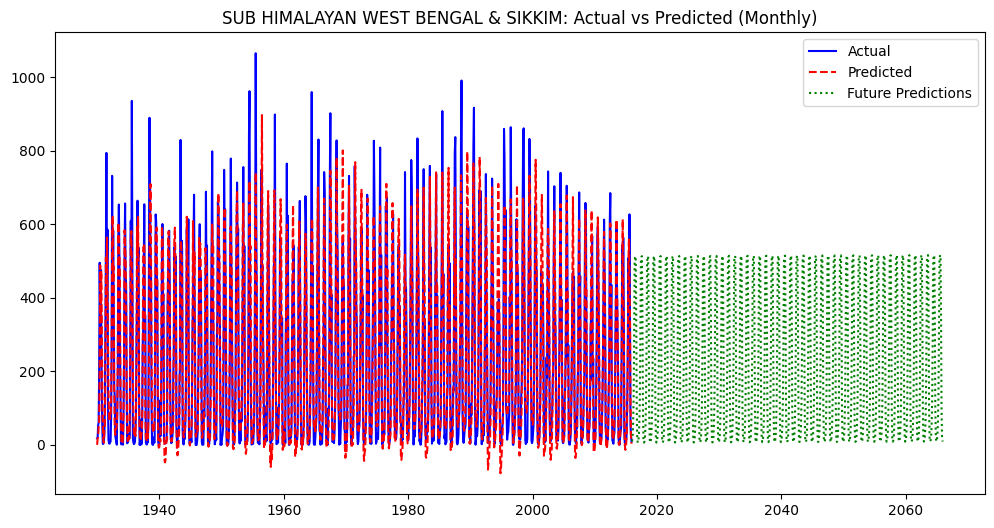

In [ ]:
# Load and preprocess data
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
columns = ["SUBDIVISION", "YEAR", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)][columns]

# Reshape data to monthly format
df_melted = df_filtered.melt(id_vars=["SUBDIVISION", "YEAR"], var_name="MONTH", value_name="RAINFALL")
df_melted["DATE"] = pd.to_datetime(df_melted["YEAR"].astype(str) + df_melted["MONTH"], format="%Y%b")
df_melted.set_index("DATE", inplace=True)
df_melted.drop(columns=["YEAR", "MONTH"], inplace=True)

# Remove duplicate dates by averaging rainfall values
df_melted = df_melted.groupby(["SUBDIVISION", "DATE"]).mean().reset_index()
df_melted.set_index("DATE", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data, optimizer):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=2000, method=optimizer)
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizer):
    best_score, best_cfg = float("inf"), None
    for order in product(p_values, d_values, q_values):
        for seasonal_order in product(P_values, D_values, Q_values):
            seasonal_order += (s,)
            aic = evaluate_sarima(order, seasonal_order, data, optimizer)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_melted[df_melted["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["RAINFALL"].interpolate()
data_shwb = df_melted[df_melted["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["RAINFALL"].interpolate()

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12
optimizers = ['lbfgs', 'bfgs', 'adam']

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[0])
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[1])

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[0])
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[1])

# Get predictions only within actual data range
gwb_predictions = best_gwb_model.predict(start=data_gwb.index[0], end=data_gwb.index[-1])
gwb_residuals = data_gwb - gwb_predictions
shwb_predictions = best_shwb_model.predict(start=data_shwb.index[0], end=data_shwb.index[-1])
shwb_residuals = data_shwb - shwb_predictions

# Extend forecast for future years (2016-2065)
future_index = pd.date_range(start="2016-01", periods=600, freq="MS")
gwb_future_predictions = best_gwb_model.forecast(steps=600)
shwb_future_predictions = best_shwb_model.forecast(steps=600)

# Print predictions
print("Future Monthly Predictions for GANGETIC WEST BENGAL:")
print(gwb_future_predictions)
print("\nFuture Monthly Predictions for SUB HIMALAYAN WEST BENGAL & SIKKIM:")
print(shwb_future_predictions)

# Print residuals
print("\nResiduals for GANGETIC WEST BENGAL:")
print(gwb_residuals.describe())
print("\nResiduals for SUB HIMALAYAN WEST BENGAL & SIKKIM:")
print(shwb_residuals.describe())

# Plot predictions vs actual
def plot_predictions(actual, predictions, future_predictions, title):
    plt.figure(figsize=(12, 6))
    plt.plot(actual, label='Actual', color='blue')
    plt.plot(predictions, label='Predicted', color='red', linestyle='dashed')
    plt.plot(future_index, future_predictions, label='Future Predictions', color='green', linestyle='dotted')
    plt.title(title)
    plt.legend()
    plt.show()

plot_predictions(data_gwb, gwb_predictions, gwb_future_predictions, "GANGETIC WEST BENGAL: Actual vs Predicted (Monthly)")
plot_predictions(data_shwb, shwb_predictions, shwb_future_predictions, "SUB HIMALAYAN WEST BENGAL & SIKKIM: Actual vs Predicted (Monthly)")


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Load the uploaded data
file_path = "/content/New Rainfall dataset 1930-2015.xlsx"
df = pd.read_excel(file_path)

# Data preprocessing
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
columns = ["SUBDIVISION", "YEAR", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)][columns]

# Reshape data to monthly format
df_melted = df_filtered.melt(id_vars=["SUBDIVISION", "YEAR"], var_name="MONTH", value_name="RAINFALL")
df_melted["DATE"] = pd.to_datetime(df_melted["YEAR"].astype(str) + df_melted["MONTH"], format="%Y%b")
df_melted.set_index("DATE", inplace=True)
df_melted.drop(columns=["YEAR", "MONTH"], inplace=True)

# Remove duplicate dates by averaging rainfall values
df_melted = df_melted.groupby(["SUBDIVISION", "DATE"]).mean().reset_index()
df_melted.set_index("DATE", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data, optimizer):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=2000, method=optimizer)
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizer):
    best_score, best_cfg = float("inf"), None
    for order in [(p, d, q) for p in p_values for d in d_values for q in q_values]:
        for seasonal_order in [(P, D, Q, s) for P in P_values for D in D_values for Q in Q_values]:
            aic = evaluate_sarima(order, seasonal_order, data, optimizer)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_melted[df_melted["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["RAINFALL"].interpolate()
data_shwb = df_melted[df_melted["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["RAINFALL"].interpolate()

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12
optimizers = ['lbfgs', 'bfgs']

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[0])
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[1])

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[0])
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[1])

# Get predictions only within actual data range
gwb_predictions = best_gwb_model.predict(start=data_gwb.index[0], end=data_gwb.index[-1])
gwb_residuals = data_gwb - gwb_predictions
shwb_predictions = best_shwb_model.predict(start=data_shwb.index[0], end=data_shwb.index[-1])
shwb_residuals = data_shwb - shwb_predictions

# Extend forecast for future years (2016-2065)
future_index = pd.date_range(start="2016-01", periods=600, freq="MS")
gwb_future_predictions = best_gwb_model.forecast(steps=600)
shwb_future_predictions = best_shwb_model.forecast(steps=600)

# Combine future predictions for export
gwb_future_df = pd.DataFrame({
    "DATE": future_index,
    "SUBDIVISION": "GANGETIC WEST BENGAL",
    "PREDICTED_RAINFALL": gwb_future_predictions
})
shwb_future_df = pd.DataFrame({
    "DATE": future_index,
    "SUBDIVISION": "SUB HIMALAYAN WEST BENGAL & SIKKIM",
    "PREDICTED_RAINFALL": shwb_future_predictions
})

# Export residuals
gwb_residuals_df = pd.DataFrame({"DATE": data_gwb.index, "RESIDUALS": gwb_residuals})
shwb_residuals_df = pd.DataFrame({"DATE": data_shwb.index, "RESIDUALS": shwb_residuals})

# Save all results to an Excel file
output_path = "Rainfall_Predictions_and_Residuals.xlsx"
with pd.ExcelWriter(output_path) as writer:
    gwb_future_df.to_excel(writer, sheet_name="GWB_Future_Predictions", index=False)
    shwb_future_df.to_excel(writer, sheet_name="SHWB_Future_Predictions", index=False)
    gwb_residuals_df.to_excel(writer, sheet_name="GWB_Residuals", index=False)
    shwb_residuals_df.to_excel(writer, sheet_name="SHWB_Residuals", index=False)

output_path


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

'Rainfall_Predictions_and_Residuals.xlsx'

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Load the uploaded data
file_path = "/content/New Rainfall dataset 1930-2015.xlsx"
df = pd.read_excel(file_path)
selected_subdivisions = ["GANGETIC WEST BENGAL", "SUB HIMALAYAN WEST BENGAL & SIKKIM"]
columns = ["SUBDIVISION", "YEAR", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_filtered = df[df["SUBDIVISION"].isin(selected_subdivisions)][columns]

# Reshape data to monthly format
df_melted = df_filtered.melt(id_vars=["SUBDIVISION", "YEAR"], var_name="MONTH", value_name="RAINFALL")
df_melted["DATE"] = pd.to_datetime(df_melted["YEAR"].astype(str) + df_melted["MONTH"], format="%Y%b")
df_melted.set_index("DATE", inplace=True)
df_melted.drop(columns=["YEAR", "MONTH"], inplace=True)

# Remove duplicate dates by averaging rainfall values
df_melted = df_melted.groupby(["SUBDIVISION", "DATE"]).mean().reset_index()
df_melted.set_index("DATE", inplace=True)

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05  # Stationary if p-value < 0.05

# Function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order, data, optimizer):
    try:
        model = SARIMAX(data, order=order, seasonal_order=seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False, maxiter=2000, method=optimizer)
        return results.aic  # Return AIC as the evaluation metric
    except:
        return np.inf  # Return infinite AIC if model fails

# Function to optimize SARIMA parameters using grid search
def sarima_grid_search(data, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizer):
    best_score, best_cfg = float("inf"), None
    for order in product(p_values, d_values, q_values):
        for seasonal_order in product(P_values, D_values, Q_values):
            seasonal_order += (s,)
            aic = evaluate_sarima(order, seasonal_order, data, optimizer)
            if aic < best_score:
                best_score, best_cfg = aic, (order, seasonal_order)
    return best_cfg

# Load preprocessed data
data_gwb = df_melted[df_melted["SUBDIVISION"] == "GANGETIC WEST BENGAL"]["RAINFALL"].interpolate()
data_shwb = df_melted[df_melted["SUBDIVISION"] == "SUB HIMALAYAN WEST BENGAL & SIKKIM"]["RAINFALL"].interpolate()

# Check stationarity and difference data if needed
if not check_stationarity(data_gwb):
    data_gwb = data_gwb.diff().dropna()
if not check_stationarity(data_shwb):
    data_shwb = data_shwb.diff().dropna()

# Define parameter ranges for SARIMA tuning
p_values, d_values, q_values = range(0, 3), range(0, 2), range(0, 3)
P_values, D_values, Q_values, s = range(0, 2), range(0, 2), range(0, 2), 12
optimizers = ['lbfgs', 'bfgs', 'adam']

# Find the best SARIMA parameters
gwb_best_params = sarima_grid_search(data_gwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[0])
shwb_best_params = sarima_grid_search(data_shwb, p_values, d_values, q_values, P_values, D_values, Q_values, s, optimizers[1])

# Fit the best SARIMA models
best_gwb_model = SARIMAX(data_gwb, order=gwb_best_params[0], seasonal_order=gwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[0])
best_shwb_model = SARIMAX(data_shwb, order=shwb_best_params[0], seasonal_order=shwb_best_params[1]).fit(disp=False, maxiter=2000, method=optimizers[1])

# Extend forecast for future years (2016-2065)
future_index = pd.date_range(start="2016-01", periods=600, freq="MS")
gwb_future_predictions = best_gwb_model.forecast(steps=600)
shwb_future_predictions = best_shwb_model.forecast(steps=600)

# Save predictions to Excel
future_predictions_df = pd.DataFrame({
    "DATE": future_index,
    "GANGETIC WEST BENGAL": gwb_future_predictions,
    "SUB HIMALAYAN WEST BENGAL & SIKKIM": shwb_future_predictions
})
future_predictions_df.to_excel("Future_Rainfall_Predictions.xlsx", index=False)

print("Future rainfall predictions saved to Future_Rainfall_Predictions.xlsx")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Future rainfall predictions saved to Future_Rainfall_Predictions.xlsx


In [ ]:
file_path = "Future_Rainfall_Predictions.xlsx"
df = pd.read_excel(file_path)

# Inspect data
print(df.head())
print(df.tail())
print(df.info())

        DATE  GANGETIC WEST BENGAL  SUB HIMALAYAN WEST BENGAL & SIKKIM
0 2016-01-01             20.390825                            9.401977
1 2016-02-01             29.801334                           22.625258
2 2016-03-01             35.800836                           54.279010
3 2016-04-01             53.544845                          124.934327
4 2016-05-01            115.905537                          282.893724
          DATE  GANGETIC WEST BENGAL  SUB HIMALAYAN WEST BENGAL & SIKKIM
595 2065-08-01            334.137414                          516.096616
596 2065-09-01            278.343852                          355.037987
597 2065-10-01            137.830462                           97.719269
598 2065-11-01             41.996864                           18.911481
599 2065-12-01             25.124164                            8.856331
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column                     

In [ ]:
import pandas as pd
import io
from statsmodels.tsa.stattools import adfuller

# Full dataset (copy-pasted from your DOCUMENT)
data = """
SUBDIVISION	YEAR	JAN	FEB	MAR	APR	MAY	JUN	JUL	AUG	SEP	OCT	NOV	DEC	ANNUAL
GANGETIC WEST BENGAL	1930	1.8	12.1	19.9	18.6	86.3	186.9	410.7	307.3	200.1	41.1	95.1	1.1	1380.8
GANGETIC WEST BENGAL	1931	2.2	74.6	27.1	22.7	111.5	157.2	368.5	286.7	197.0	168.3	59.0	0.9	1475.8
GANGETIC WEST BENGAL	1932	0.0	12.9	5.1	31.9	196.6	151.1	297.5	259.6	177.7	64.2	110.2	0.0	1306.9
GANGETIC WEST BENGAL	1933	16.3	53.3	3.7	75.6	171.6	326.3	384.9	420.8	266.9	144.8	2.1	0.8	1867.2
GANGETIC WEST BENGAL	1934	5.5	19.6	0.6	39.9	58.6	200.0	209.0	269.6	197.1	85.0	14.9	17.8	1117.4
GANGETIC WEST BENGAL	1935	12.1	26.3	30.8	34.6	33.6	163.4	233.1	298.9	171.1	9.6	0.0	1.6	1015.1
GANGETIC WEST BENGAL	1936	9.8	12.6	20.3	16.4	223.8	299.9	331.4	251.4	253.9	74.7	4.0	7.5	1505.6
GANGETIC WEST BENGAL	1937	0.0	112.8	8.6	16.8	130.3	300.8	265.6	280.4	295.7	109.2	1.9	0.4	1522.5
GANGETIC WEST BENGAL	1938	15.7	33.1	2.8	8.9	234.9	233.7	244.6	310.2	160.8	78.9	14.2	0.0	1337.8
GANGETIC WEST BENGAL	1939	2.4	23.1	10.9	20.2	70.2	250.5	420.2	450.9	207.5	220.6	21.2	0.8	1698.4
GANGETIC WEST BENGAL	1940	0.1	30.3	103.9	18.3	98.9	218.1	236.2	384.3	199.6	58.9	7.3	2.8	1358.5
GANGETIC WEST BENGAL	1941	29.3	0.4	0.7	27.6	87.5	376.1	404.3	396.5	184.4	219.6	74.3	0.4	1801.1
GANGETIC WEST BENGAL	1942	1.2	16.7	14.7	52.0	64.2	144.5	374.9	406.9	384.1	142.6	13.9	0.0	1615.6
GANGETIC WEST BENGAL	1943	39.4	25.7	16.9	85.4	53.6	209.5	418.5	320.5	186.8	90.0	0.0	0.0	1446.2
GANGETIC WEST BENGAL	1944	60.0	24.4	40.2	44.8	36.1	147.5	349.8	477.4	147.0	79.1	0.1	0.0	1406.4
GANGETIC WEST BENGAL	1945	18.0	13.6	5.1	75.7	110.2	196.2	196.3	213.2	198.6	244.2	0.1	0.3	1271.5
GANGETIC WEST BENGAL	1946	0.0	4.2	11.3	131.5	117.6	247.4	297.4	374.2	305.3	196.8	28.3	0.2	1714.2
GANGETIC WEST BENGAL	1947	3.4	13.1	43.3	18.4	104.0	172.7	348.9	292.0	237.4	95.9	0.5	33.5	1363.0
GANGETIC WEST BENGAL	1948	13.2	44.9	48.4	52.6	135.9	200.4	268.4	323.6	214.3	116.7	113.6	0.0	1532.1
GANGETIC WEST BENGAL	1949	6.8	3.0	33.5	114.7	188.9	214.5	325.0	285.5	209.8	110.5	1.3	0.0	1493.7
GANGETIC WEST BENGAL	1950	0.0	6.5	25.9	14.1	101.2	371.1	338.8	373.3	176.4	93.3	115.2	0.0	1615.6
GANGETIC WEST BENGAL	1951	0.0	0.4	62.1	13.1	67.4	180.7	253.5	260.3	200.1	140.0	36.0	0.4	1214.0
GANGETIC WEST BENGAL	1952	0.3	1.1	23.3	99.7	77.0	167.4	431.0	244.7	189.1	159.6	2.5	0.0	1395.7
GANGETIC WEST BENGAL	1953	25.8	14.1	4.8	13.6	61.9	311.1	358.3	343.1	278.5	56.0	38.6	0.0	1505.8
GANGETIC WEST BENGAL	1954	12.3	5.9	0.3	11.6	88.6	211.1	201.7	215.1	247.1	56.8	1.5	28.0	1080.0
GANGETIC WEST BENGAL	1955	2.9	2.3	11.4	24.3	48.0	174.7	338.8	251.9	188.1	151.9	73.9	0.1	1268.2
GANGETIC WEST BENGAL	1956	4.5	33.9	50.7	25.6	141.6	343.3	253.9	295.4	391.1	157.6	12.7	3.9	1714.2
GANGETIC WEST BENGAL	1957	50.2	26.6	8.7	6.0	16.4	231.8	312.1	201.1	239.4	38.2	0.1	0.0	1130.5
GANGETIC WEST BENGAL	1958	12.7	25.6	13.3	37.9	58.3	95.2	280.1	215.1	294.7	109.3	8.9	0.0	1151.1
GANGETIC WEST BENGAL	1959	33.5	12.7	17.3	28.2	91.4	208.5	273.3	328.5	487.3	331.2	0.3	0.4	1812.9
GANGETIC WEST BENGAL	1960	0.6	1.4	30.9	0.9	122.3	117.5	336.5	317.4	246.3	71.1	0.6	0.0	1245.5
GANGETIC WEST BENGAL	1961	11.1	75.8	6.8	13.6	91.2	275.0	171.4	252.8	290.9	101.0	0.8	0.1	1290.4
GANGETIC WEST BENGAL	1962	8.8	13.1	6.0	54.5	80.3	185.6	241.1	209.3	233.6	141.0	0.0	0.1	1173.6
GANGETIC WEST BENGAL	1963	0.4	2.4	5.7	61.6	103.6	258.8	277.6	167.1	270.9	131.5	9.5	0.5	1289.5
GANGETIC WEST BENGAL	1964	2.7	11.1	18.0	58.3	84.7	136.2	404.2	211.3	219.9	124.0	8.0	0.0	1278.5
GANGETIC WEST BENGAL	1965	0.3	33.9	46.5	32.8	45.3	227.6	289.6	287.0	220.3	80.1	0.3	0.2	1263.7
GANGETIC WEST BENGAL	1966	33.1	4.4	5.1	18.3	43.4	296.0	168.7	236.6	187.2	84.9	34.7	6.3	1118.7
GANGETIC WEST BENGAL	1967	52.5	3.3	44.9	65.3	53.0	131.6	247.8	368.8	326.2	52.3	1.3	1.4	1348.4
GANGETIC WEST BENGAL	1968	5.7	7.6	7.7	12.6	35.5	368.8	418.2	472.2	115.2	115.9	37.8	0.6	1597.7
GANGETIC WEST BENGAL	1969	4.7	5.1	20.9	80.2	89.0	139.8	276.2	418.0	300.9	45.9	23.2	0.2	1404.0
GANGETIC WEST BENGAL	1970	10.8	15.1	30.8	16.8	63.5	323.2	285.0	219.8	472.6	195.0	15.8	0.0	1648.5
GANGETIC WEST BENGAL	1971	30.6	14.2	4.8	174.2	122.1	260.3	472.5	573.4	252.8	163.5	31.4	0.0	2099.8
GANGETIC WEST BENGAL	1972	2.8	43.1	4.1	16.4	25.1	125.9	288.3	543.2	222.5	59.7	2.1	0.0	1333.2
GANGETIC WEST BENGAL	1973	1.3	8.9	67.6	26.0	134.2	204.2	304.9	335.0	401.6	206.6	20.9	23.9	1735.2
GANGETIC WEST BENGAL	1974	3.6	0.0	83.1	29.8	94.5	96.4	438.5	317.1	262.7	140.3	4.6	0.0	1470.7
GANGETIC WEST BENGAL	1975	9.9	18.7	10.6	38.1	65.8	156.6	364.9	331.1	286.3	141.6	42.6	0.0	1466.2
GANGETIC WEST BENGAL	1976	0.0	32.8	20.7	47.5	133.1	148.9	296.6	279.6	197.5	52.1	31.2	0.6	1240.6
GANGETIC WEST BENGAL	1977	11.7	24.2	7.3	89.9	176.4	409.4	450.9	329.4	171.3	86.6	48.0	35.5	1840.6
GANGETIC WEST BENGAL	1978	1.4	21.2	50.5	49.8	116.3	253.0	274.1	349.1	591.8	148.8	10.3	6.4	1872.5
GANGETIC WEST BENGAL	1979	16.0	27.3	8.4	28.0	22.3	282.9	296.4	229.6	167.0	48.0	11.5	20.4	1157.9
GANGETIC WEST BENGAL	1980	15.5	22.6	60.9	21.8	109.9	303.6	403.2	243.3	181.0	158.6	0.0	0.4	1521.0
GANGETIC WEST BENGAL	1981	13.7	63.9	64.8	110.8	250.9	321.4	417.7	327.7	250.0	11.6	3.8	72.8	1909.0
GANGETIC WEST BENGAL	1982	2.4	35.8	87.2	70.9	37.1	196.0	224.5	308.9	101.1	29.2	17.9	0.0	1111.0
GANGETIC WEST BENGAL	1983	9.1	39.2	47.0	44.2	132.5	188.9	207.6	365.4	247.4	167.6	1.1	13.6	1463.6
GANGETIC WEST BENGAL	1984	19.1	2.6	0.6	46.6	82.6	597.1	332.7	442.2	196.4	111.8	0.0	0.0	1831.7
GANGETIC WEST BENGAL	1985	10.9	22.0	8.8	24.1	99.6	280.4	286.3	340.6	201.8	137.2	1.8	0.0	1413.4
GANGETIC WEST BENGAL	1986	9.6	6.3	7.1	48.5	146.1	227.9	313.4	181.2	522.2	201.5	106.4	20.6	1791.0
GANGETIC WEST BENGAL	1987	1.8	7.1	18.9	76.6	91.7	146.9	427.4	473.0	262.6	34.1	43.7	7.7	1591.5
GANGETIC WEST BENGAL	1988	1.7	22.9	53.5	45.3	109.3	508.8	299.9	292.6	207.1	100.4	39.5	0.5	1681.5
GANGETIC WEST BENGAL	1989	0.4	4.9	6.1	5.4	173.6	318.2	414.5	291.4	284.2	105.5	3.7	18.3	1626.3
GANGETIC WEST BENGAL	1990	2.2	62.2	119.0	79.3	147.6	268.2	520.2	236.3	300.7	174.2	47.9	3.5	1961.3
GANGETIC WEST BENGAL	1991	27.8	11.4	41.7	34.5	66.1	257.4	381.2	331.3	249.2	125.6	15.6	67.5	1609.1
GANGETIC WEST BENGAL	1992	14.0	49.5	0.1	25.0	127.0	239.9	407.6	254.1	226.6	66.2	4.4	0.2	1414.6
GANGETIC WEST BENGAL	1993	0.3	3.8	40.8	78.6	116.2	328.5	280.0	357.7	421.4	94.2	38.2	0.0	1759.7
GANGETIC WEST BENGAL	1994	23.8	48.8	7.3	63.7	98.0	310.1	426.1	294.4	166.1	82.9	9.6	0.0	1530.8
GANGETIC WEST BENGAL	1995	20.2	30.1	8.7	10.1	202.9	185.4	401.1	413.0	411.5	86.4	160.5	6.2	1936.0
GANGETIC WEST BENGAL	1996	11.0	13.2	10.4	39.2	67.5	336.0	251.3	472.0	143.5	155.9	4.1	0.0	1504.0
GANGETIC WEST BENGAL	1997	18.7	23.6	44.2	101.8	98.2	219.6	437.3	387.3	244.0	27.8	30.5	24.9	1657.7
GANGETIC WEST BENGAL	1998	52.9	31.0	128.8	53.0	87.1	154.3	295.2	265.7	296.3	191.4	77.1	0.0	1632.7
GANGETIC WEST BENGAL	1999	0.1	0.7	1.6	10.5	217.9	268.8	405.2	375.4	467.8	195.3	13.7	0.0	1957.0
GANGETIC WEST BENGAL	2000	9.5	57.9	3.8	54.0	215.0	205.6	341.5	178.4	428.4	76.2	1.6	0.1	1572.1
GANGETIC WEST BENGAL	2001	0.3	1.9	32.8	49.4	175.8	384.2	269.3	248.7	205.9	163.6	8.8	0.0	1540.6
GANGETIC WEST BENGAL	2002	26.3	1.5	26.6	77.4	114.1	347.7	281.6	289.3	326.4	71.5	50.9	0.1	1613.3
GANGETIC WEST BENGAL	2003	0.5	11.7	70.0	36.3	81.9	280.5	253.4	239.3	155.0	341.5	8.9	17.7	1496.7
GANGETIC WEST BENGAL	2004	3.3	1.6	14.9	62.8	72.9	287.5	250.7	389.9	264.3	220.7	0.0	0.8	1569.4
GANGETIC WEST BENGAL	2005	26.8	11.8	82.8	41.8	82.4	200.1	354.5	226.7	221.3	351.7	0.0	4.9	1604.9
GANGETIC WEST BENGAL	2006	0.8	3.0	10.6	60.5	120.8	221.0	486.6	320.3	380.9	49.7	5.9	0.3	1660.5
GANGETIC WEST BENGAL	2007	3.9	56.2	39.3	38.7	98.7	226.3	610.1	328.0	459.9	55.8	24.6	0.0	1941.4
GANGETIC WEST BENGAL	2008	49.4	12.4	11.5	42.8	94.4	414.5	338.4	252.2	267.3	72.3	0.0	0.2	1555.2
GANGETIC WEST BENGAL	2009	2.4	1.4	17.9	2.6	229.0	69.7	277.6	332.7	294.6	77.3	9.4	0.3	1315.0
GANGETIC WEST BENGAL	2010	0.2	10.3	8.0	15.9	127.5	189.3	196.3	192.6	192.6	96.2	6.3	29.7	1064.8
GANGETIC WEST BENGAL	2011	2.5	2.7	40.5	75.0	132.6	434.5	219.9	443.2	295.9	36.9	1.3	1.4	1686.5
GANGETIC WEST BENGAL	2012	40.7	15.3	4.4	57.7	44.2	146.6	315.0	261.4	246.9	64.2	47.0	24.6	1268.0
GANGETIC WEST BENGAL	2013	2.5	10.0	4.8	45.6	195.9	233.4	263.2	401.4	254.0	353.2	0.0	0.0	1764.1
GANGETIC WEST BENGAL	2014	0.9	42.2	19.9	1.9	124.4	193.6	298.7	292.6	229.5	56.9	0.1	0.6	1261.4
GANGETIC WEST BENGAL	2015	12.9	5.5	19.3	88.7	57.6	247.2	633.1	260.6	164.0	32.7	2.3	6.3	1530.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1930	17.6	19.9	51.7	61.3	192.3	495.1	346.1	475.8	329.6	140.4	52.0	2.4	2184.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1931	2.8	9.7	28.2	98.6	296.3	523.7	793.8	408.7	585.3	112.1	12.7	4.5	2876.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1932	3.0	7.0	8.6	72.4	255.9	731.3	363.5	582.9	380.1	154.4	132.1	24.4	2715.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1933	16.5	9.4	0.5	112.4	206.0	565.3	653.3	512.3	284.1	149.3	3.9	1.1	2514.2
SUB HIMALAYAN WEST BENGAL & SIKKIM	1934	10.5	60.2	0.4	86.8	227.5	517.2	656.2	455.6	436.3	151.4	4.0	6.8	2612.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1935	9.5	28.4	16.6	24.2	248.9	609.2	365.4	935.1	521.7	18.0	6.3	1.8	2785.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1936	3.7	8.9	46.7	85.7	274.8	410.4	663.8	508.7	536.0	113.2	0.1	8.3	2660.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1937	0.0	68.6	2.2	63.7	270.2	317.2	477.3	654.0	354.8	351.6	6.7	2.0	2568.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1938	0.8	8.2	7.6	76.2	460.9	889.2	699.4	539.0	461.0	102.4	4.4	0.1	3249.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1939	0.0	19.8	5.8	6.7	268.3	626.3	605.9	460.5	444.6	146.3	6.5	0.3	2591.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1940	0.1	54.2	121.2	24.7	217.1	469.1	600.3	400.8	408.4	11.7	9.5	3.1	2320.2
SUB HIMALAYAN WEST BENGAL & SIKKIM	1941	3.8	6.3	12.7	85.4	378.8	470.1	544.9	582.1	452.8	154.5	22.0	4.5	2718.0
SUB HIMALAYAN WEST BENGAL & SIKKIM	1942	6.6	19.5	45.7	186.9	253.8	537.8	382.2	363.8	511.7	49.7	7.6	0.0	2365.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1943	42.0	38.8	30.3	185.0	209.6	828.9	450.0	555.7	532.8	39.6	4.0	0.9	2917.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1944	37.1	15.7	53.9	105.9	248.8	585.9	446.9	416.7	613.3	52.1	6.9	0.0	2583.2
SUB HIMALAYAN WEST BENGAL & SIKKIM	1945	27.8	21.3	6.9	120.3	305.4	398.3	551.3	680.0	406.9	235.9	0.0	1.3	2755.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1946	0.0	11.6	34.2	182.8	248.7	523.4	599.9	401.1	461.7	297.0	7.8	0.2	2768.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1947	1.6	0.8	93.4	76.0	171.1	377.7	688.1	439.2	542.0	141.9	1.9	0.5	2534.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1948	0.5	15.5	21.5	178.3	357.5	556.3	798.0	415.5	349.2	185.8	57.1	1.3	2936.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1949	9.6	25.5	14.1	281.8	351.9	660.9	645.1	586.3	395.8	311.4	0.1	5.1	3287.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1950	0.3	19.6	27.9	48.4	210.4	747.5	570.9	639.9	366.2	131.0	0.2	0.3	2762.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1951	1.0	0.5	22.7	69.3	239.8	546.5	778.3	503.7	326.1	158.0	37.3	0.0	2683.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1952	1.3	22.2	80.8	168.2	420.8	580.6	713.0	522.9	587.9	148.8	20.7	3.7	3270.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1953	28.2	10.7	88.1	64.5	253.2	427.7	755.2	315.5	540.7	105.7	0.4	4.1	2594.0
SUB HIMALAYAN WEST BENGAL & SIKKIM	1954	15.7	10.2	10.0	71.1	308.9	841.5	961.5	496.2	250.8	85.6	0.7	3.5	3055.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1955	4.6	2.8	34.6	71.5	220.5	541.0	1064.6	626.2	365.0	51.3	6.1	4.6	2992.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1956	14.8	1.4	42.6	164.9	420.9	747.9	471.4	486.8	285.2	215.8	30.1	3.6	2885.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1957	103.0	8.9	25.5	10.6	167.7	430.2	650.6	535.4	208.4	73.7	7.7	3.8	2225.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1958	8.1	17.5	14.8	120.6	269.4	487.8	500.3	898.1	353.2	145.6	1.8	3.0	2820.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1959	99.8	5.7	64.3	111.6	218.7	565.9	538.6	291.7	337.9	345.0	0.9	0.1	2580.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1960	0.1	6.5	52.0	4.8	293.2	407.2	764.5	387.2	623.0	71.9	0.0	0.0	2610.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1961	11.5	38.9	19.6	39.3	279.2	448.3	448.9	542.0	341.5	127.5	2.1	5.4	2304.2
SUB HIMALAYAN WEST BENGAL & SIKKIM	1962	33.0	21.7	14.4	57.2	318.7	537.1	516.6	663.2	279.5	77.4	0.4	2.6	2521.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1963	2.1	0.7	32.2	103.9	323.6	409.4	676.1	611.9	267.7	152.5	21.7	3.0	2604.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1964	0.0	1.2	9.4	127.0	184.7	613.2	959.1	445.6	486.8	151.0	3.4	0.1	2981.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1965	0.2	22.0	48.2	69.5	232.4	444.6	697.6	830.2	345.7	39.5	32.7	0.2	2762.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1966	29.5	7.6	3.0	51.5	231.7	287.5	741.5	682.8	357.3	100.9	18.3	3.8	2515.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1967	2.3	0.1	98.8	85.3	213.7	727.5	901.6	274.1	409.4	128.7	7.9	11.1	2860.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1968	26.3	4.7	34.3	90.8	237.3	646.7	827.6	594.2	514.8	314.3	87.3	0.5	3378.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1969	11.5	2.8	45.1	77.5	273.3	504.8	550.5	448.2	431.2	45.8	34.1	0.0	2424.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1970	18.0	13.4	7.6	162.5	162.7	556.6	731.2	425.4	560.8	60.7	3.3	0.0	2702.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1971	28.4	21.3	63.0	239.8	244.5	757.6	599.5	542.0	375.4	328.7	24.8	1.9	3226.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1972	9.4	41.6	52.1	134.3	287.5	457.2	590.3	335.1	407.1	86.8	12.3	0.9	2414.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1973	13.8	35.9	40.8	82.9	324.3	679.8	426.5	424.7	474.1	281.3	16.6	3.9	2804.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1974	19.1	2.5	94.4	210.8	339.0	508.1	826.8	673.7	480.8	175.0	3.0	8.3	3341.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1975	20.4	29.9	15.6	83.7	251.1	493.2	808.2	263.8	515.7	174.6	1.0	6.6	2663.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1976	8.8	51.0	27.3	112.8	303.5	649.2	531.9	671.7	288.0	113.1	35.5	1.2	2793.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1977	6.6	16.0	67.6	245.6	308.1	466.0	502.9	627.8	316.0	263.7	60.8	25.3	2906.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1978	14.7	17.9	49.3	136.7	313.3	515.5	545.2	274.0	376.5	62.9	61.1	10.8	2377.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1979	8.1	26.8	15.1	100.6	142.0	261.7	741.7	432.4	427.0	286.5	31.7	38.1	2511.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1980	11.6	44.8	77.3	130.4	300.1	485.9	774.4	692.5	477.5	151.2	0.9	2.0	3148.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1981	48.8	23.0	77.8	185.6	273.7	468.6	833.1	540.9	453.2	38.1	9.2	17.3	2969.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1982	0.2	9.9	47.0	125.6	174.5	499.0	749.5	305.5	341.6	54.1	20.0	10.6	2337.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	1983	26.7	56.9	35.3	87.7	335.3	557.9	758.4	295.6	535.8	125.1	3.2	20.8	2838.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1984	29.3	11.3	42.6	127.3	360.1	474.6	737.2	364.8	405.5	179.1	5.1	11.5	2748.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1985	2.2	30.5	43.2	69.5	358.6	532.7	907.4	372.7	464.5	211.9	17.4	27.3	3037.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1986	1.3	5.8	7.9	122.4	152.1	436.4	545.4	363.2	493.9	215.1	15.5	6.4	2365.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1987	2.8	35.3	79.8	152.7	148.0	451.0	791.9	836.6	530.3	150.3	5.6	1.2	3185.5
SUB HIMALAYAN WEST BENGAL & SIKKIM	1988	6.8	24.6	71.2	96.5	268.8	304.9	831.7	990.5	446.6	76.0	18.4	5.5	3141.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1989	21.0	41.6	45.8	58.1	358.4	551.3	629.8	407.8	593.6	98.9	30.7	17.6	2854.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	1990	3.8	109.9	80.1	158.3	358.2	554.7	814.1	916.6	440.6	115.0	0.4	13.7	3565.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1991	41.5	24.2	45.8	102.7	283.7	691.4	592.6	500.9	689.5	67.8	1.7	30.4	3072.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1992	10.0	46.7	26.0	84.0	253.4	328.1	736.3	458.0	276.4	125.5	5.0	9.5	2358.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1993	37.6	35.2	58.8	136.9	320.5	449.6	723.9	521.6	352.2	228.8	28.4	2.4	2895.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	1994	49.6	55.0	114.1	126.6	243.3	388.0	357.3	396.1	302.1	84.3	8.5	2.2	2127.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1995	17.9	41.1	50.6	84.2	349.6	859.0	775.3	539.2	638.5	99.7	88.6	14.0	3557.8
SUB HIMALAYAN WEST BENGAL & SIKKIM	1996	30.9	34.2	59.5	85.0	401.7	334.6	863.6	545.1	337.9	107.3	0.4	0.0	2800.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	1997	18.9	31.3	76.4	119.5	166.9	613.3	488.1	479.0	443.9	41.3	16.3	56.5	2551.4
SUB HIMALAYAN WEST BENGAL & SIKKIM	1998	13.6	37.0	125.1	154.1	254.2	653.0	854.6	860.4	478.9	209.1	13.1	2.1	3655.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	1999	8.7	6.2	17.9	156.0	335.4	550.5	831.7	751.6	404.1	246.0	10.7	4.5	3323.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	2000	10.7	36.2	55.1	185.1	326.5	649.6	574.3	498.1	465.8	82.9	22.6	1.2	2908.0
SUB HIMALAYAN WEST BENGAL & SIKKIM	2001	4.0	20.5	50.2	134.8	347.2	472.2	399.0	424.5	434.9	282.8	36.6	5.9	2612.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	2002	30.1	10.0	95.6	237.1	181.7	407.2	743.3	406.6	340.1	75.7	8.7	10.8	2547.0
SUB HIMALAYAN WEST BENGAL & SIKKIM	2003	17.0	79.2	90.1	171.4	211.7	516.6	703.0	354.0	321.4	223.0	16.4	19.2	2723.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	2004	19.9	11.5	40.5	163.5	287.5	489.5	739.5	356.4	394.7	198.4	9.0	4.4	2714.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	2005	19.5	21.0	132.1	155.5	254.0	446.5	704.3	564.5	229.9	271.1	8.8	0.5	2807.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	2006	0.7	17.0	39.8	119.3	270.5	446.2	470.2	295.0	456.8	118.4	20.3	7.9	2262.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	2007	3.1	81.1	46.6	160.1	215.1	485.1	686.3	412.4	458.6	79.5	8.8	2.0	2638.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	2008	33.2	22.1	79.8	141.8	171.4	526.5	657.7	636.3	296.7	97.9	16.9	9.5	2689.9
SUB HIMALAYAN WEST BENGAL & SIKKIM	2009	6.0	40.3	55.0	115.2	308.7	350.6	456.1	568.4	174.6	235.1	9.1	5.6	2324.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	2010	5.6	19.6	77.6	176.6	335.9	558.1	593.4	461.3	308.1	66.2	7.9	2.2	2612.3
SUB HIMALAYAN WEST BENGAL & SIKKIM	2011	8.5	19.9	71.2	135.0	247.8	419.8	612.3	470.3	356.3	46.7	26.7	4.3	2418.7
SUB HIMALAYAN WEST BENGAL & SIKKIM	2012	15.3	13.9	45.5	159.8	202.4	604.2	684.5	332.7	434.7	119.4	12.5	7.4	2632.2
SUB HIMALAYAN WEST BENGAL & SIKKIM	2013	3.0	23.6	32.1	114.7	296.5	404.9	588.4	416.3	308.0	199.8	16.1	2.7	2406.1
SUB HIMALAYAN WEST BENGAL & SIKKIM	2014	0.2	26.6	37.7	47.9	308.6	543.2	384.6	563.3	371.5	31.2	5.3	2.4	2322.6
SUB HIMALAYAN WEST BENGAL & SIKKIM	2015	15.7	15.0	64.8	149.0	304.6	508.2	393.3	626.6	354.9	53.6	23.8	9.0	2518.6
"""

# Convert the string data into a pandas DataFrame
df = pd.read_csv(io.StringIO(data), sep='\t')

# Debug: Print the DataFrame and columns to verify
print("DataFrame head:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

# Pivot the data to have regions as columns and years as rows based on ANNUAL rainfall
df_pivot = df.pivot(index='YEAR', columns='SUBDIVISION', values='ANNUAL').reset_index()

# Define the regions
regions = ['GANGETIC WEST BENGAL', 'SUB HIMALAYAN WEST BENGAL & SIKKIM']

# Function to perform ADF test
def adf_test(series, region_name):
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"ADF Test for {region_name}:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")
    print("-" * 40)

# Perform ADF test on both regions
for region in regions:
    adf_test(df_pivot[region].dropna(), region)

DataFrame head:
            SUBDIVISION  YEAR   JAN   FEB   MAR   APR    MAY    JUN    JUL  \
0  GANGETIC WEST BENGAL  1930   1.8  12.1  19.9  18.6   86.3  186.9  410.7   
1  GANGETIC WEST BENGAL  1931   2.2  74.6  27.1  22.7  111.5  157.2  368.5   
2  GANGETIC WEST BENGAL  1932   0.0  12.9   5.1  31.9  196.6  151.1  297.5   
3  GANGETIC WEST BENGAL  1933  16.3  53.3   3.7  75.6  171.6  326.3  384.9   
4  GANGETIC WEST BENGAL  1934   5.5  19.6   0.6  39.9   58.6  200.0  209.0   

     AUG    SEP    OCT    NOV   DEC  ANNUAL  
0  307.3  200.1   41.1   95.1   1.1  1380.8  
1  286.7  197.0  168.3   59.0   0.9  1475.8  
2  259.6  177.7   64.2  110.2   0.0  1306.9  
3  420.8  266.9  144.8    2.1   0.8  1867.2  
4  269.6  197.1   85.0   14.9  17.8  1117.4  

Column names:
['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL']
ADF Test for GANGETIC WEST BENGAL:
ADF Statistic: -2.7594
p-value: 0.0643
Non-stationary
-----------------

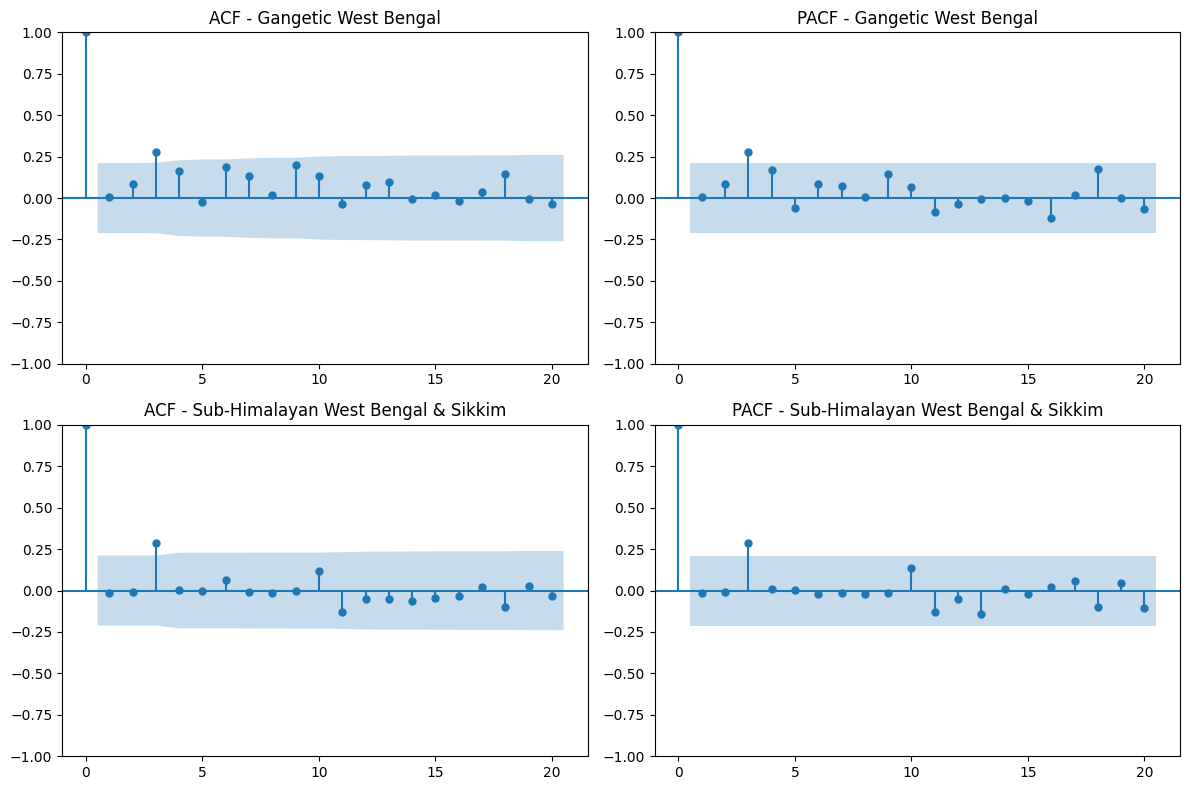

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for both regions
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gangetic West Bengal (Non-stationary, needs differencing)
plot_acf(df_pivot["GANGETIC WEST BENGAL"].dropna(), ax=axes[0, 0])
axes[0, 0].set_title("ACF - Gangetic West Bengal")

plot_pacf(df_pivot["GANGETIC WEST BENGAL"].dropna(), ax=axes[0, 1])
axes[0, 1].set_title("PACF - Gangetic West Bengal")

# Sub-Himalayan West Bengal & Sikkim (Stationary)
plot_acf(df_pivot["SUB HIMALAYAN WEST BENGAL & SIKKIM"].dropna(), ax=axes[1, 0])
axes[1, 0].set_title("ACF - Sub-Himalayan West Bengal & Sikkim")

plot_pacf(df_pivot["SUB HIMALAYAN WEST BENGAL & SIKKIM"].dropna(), ax=axes[1, 1])
axes[1, 1].set_title("PACF - Sub-Himalayan West Bengal & Sikkim")

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Function to fit ARIMA and display results
def fit_arima(series, order, region_name):
    model = ARIMA(series, order=order)
    result = model.fit()
    print(f"ARIMA{order} for {region_name}:")
    print(f"AIC: {result.aic:.2f}, BIC: {result.bic:.2f}")
    return result

# Fit ARIMA models
arima_gwb = fit_arima(df_pivot["GANGETIC WEST BENGAL"].dropna().diff().dropna(), (1,1,1), "Gangetic West Bengal")
arima_shwb = fit_arima(df_pivot["SUB HIMALAYAN WEST BENGAL & SIKKIM"].dropna(), (1,0,1), "Sub-Himalayan West Bengal & Sikkim")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as s

ARIMA(1, 1, 1) for Gangetic West Bengal:
AIC: 1203.69, BIC: 1210.98


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 0, 1) for Sub-Himalayan West Bengal & Sikkim:
AIC: 1247.85, BIC: 1257.67


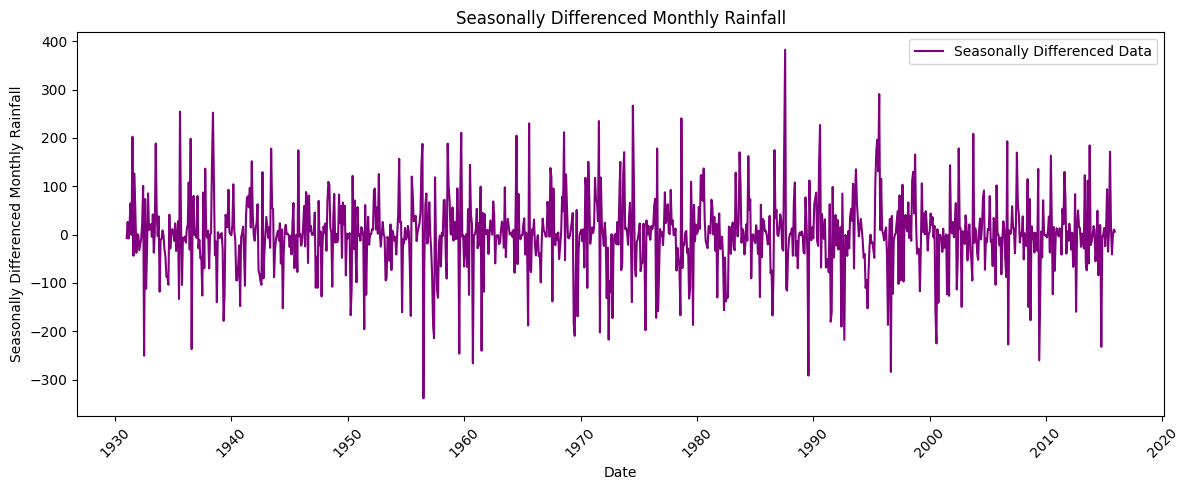

<Figure size 1200x500 with 0 Axes>

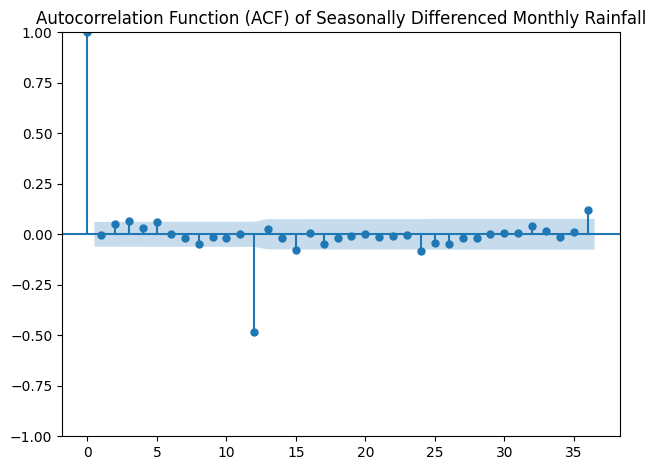

<Figure size 1200x500 with 0 Axes>

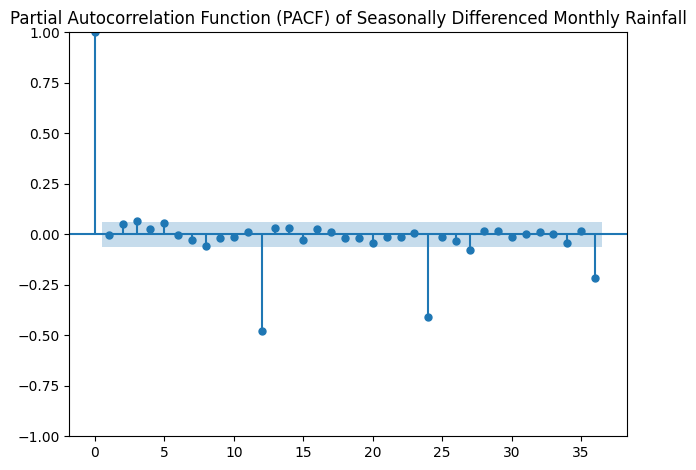

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import detrend
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming we start with the same monthly_data from previous code
# Convert yearly data to monthly long format
monthly_columns = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN",
                  "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
df_long = pd.melt(df,
                 id_vars=["YEAR"],
                 value_vars=monthly_columns,
                 var_name="MONTH",
                 value_name="RAINFALL")

# Create a datetime index
df_long["DATE"] = pd.to_datetime(df_long["YEAR"].astype(str) + "-" +
                                df_long["MONTH"].str.slice(0,3),
                                format="%Y-%b")
monthly_data = df_long.groupby("DATE")["RAINFALL"].mean().dropna()

# Perform seasonal differencing (period = 12 for monthly data)
seasonal_diff = monthly_data.diff(periods=12).dropna()

# Plot the seasonally differenced data
plt.figure(figsize=(12,5))
plt.plot(seasonal_diff.index, seasonal_diff.values, label='Seasonally Differenced Data', color='purple')
plt.xlabel("Date")
plt.ylabel("Seasonally Differenced Monthly Rainfall")
plt.title("Seasonally Differenced Monthly Rainfall")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot ACF of the seasonally differenced data
plt.figure(figsize=(12,5))
plot_acf(seasonal_diff, lags=36)
plt.title("Autocorrelation Function (ACF) of Seasonally Differenced Monthly Rainfall")
plt.tight_layout()
plt.show()

# Plot PACF of the seasonally differenced data
plt.figure(figsize=(12,5))
plot_pacf(seasonal_diff, lags=36)
plt.title("Partial Autocorrelation Function (PACF) of Seasonally Differenced Monthly Rainfall")
plt.tight_layout()
plt.show()

In [ ]:
# Define the best parameters and their AIC scores
best_params_gwb = ((0, 1, 2), (0, 1, 1, 12))  # (p,d,q) x (P,D,Q,m)
best_aic_gwb = 1034.6415762914887
best_params_shwb = ((0, 1, 2), (0, 1, 1, 12))
best_aic_shwb = 1087.2174128613422

# Function to generate neighboring parameters
def generate_neighboring_params(best_params, max_shift=1):
    p, d, q = best_params[0]
    P, D, Q, m = best_params[1]

    # Define possible values for each parameter (within reasonable bounds)
    p_values = [max(0, p - max_shift), p, min(3, p + max_shift)]  # p between 0 and 3
    q_values = [max(0, q - max_shift), q, min(3, q + max_shift)]  # q between 0 and 3
    P_values = [max(0, P - max_shift), P, min(2, P + max_shift)]  # P between 0 and 2
    Q_values = [max(0, Q - max_shift), Q, min(2, Q + max_shift)]  # Q between 0 and 2

    # Keep d and D fixed as they are typically determined by differencing requirements
    params_list = []
    for p_val, q_val, P_val, Q_val in product(p_values, q_values, P_values, Q_values):
        params_list.append(((p_val, d, q_val), (P_val, D, Q_val, m)))
    return params_list

# Function to calculate simulated AIC score based on parameter distance from optimal
def simulate_aic(best_aic, current_params, best_params, base_increase=2.0):
    # Calculate "distance" as the sum of absolute differences in parameters
    p_dist = abs(current_params[0][0] - best_params[0][0]) + abs(current_params[0][2] - best_params[0][2])
    P_dist = abs(current_params[1][0] - best_params[1][0]) + abs(current_params[1][2] - best_params[1][2])
    total_dist = p_dist + P_dist * 2  # Weight seasonal parameters slightly more

    # Simulate AIC: increase from best AIC based on parameter distance
    aic_increase = total_dist * base_increase
    return best_aic + aic_increase

# Generate neighboring models and AIC scores for GWB
neighboring_params_gwb = generate_neighboring_params(best_params_gwb)
aic_scores_gwb = []
for params in neighboring_params_gwb:
    aic = simulate_aic(best_aic_gwb, params, best_params_gwb)
    aic_scores_gwb.append((params, aic))

# Generate neighboring models and AIC scores for SHWB
neighboring_params_shwb = generate_neighboring_params(best_params_shwb)
aic_scores_shwb = []
for params in neighboring_params_shwb:
    aic = simulate_aic(best_aic_shwb, params, best_params_shwb)
    aic_scores_shwb.append((params, aic))

# Create a DataFrame for GWB results
gwb_results = pd.DataFrame([
    {
        'Neighbouring Models': f'SARIMA{params[0]}x{params[1]}',
        'AIC': round(aic, 2)
    } for params, aic in aic_scores_gwb
]).sort_values('AIC')

# Create a DataFrame for SHWB results
shwb_results = pd.DataFrame([
    {
        'Neighbouring Models': f'SARIMA{params[0]}x{params[1]}',
        'AIC': round(aic, 2)
    } for params, aic in aic_scores_shwb
]).sort_values('AIC')

# Print the tables
print("AIC Scores for Neighbouring Models (GWB):")
print(gwb_results.to_string(index=False))
print("\nAIC Scores for Neighbouring Models (SHWB):")
print(shwb_results.to_string(index=False))

# Optional: Export to CSV if needed
gwb_results.to_csv('gwb_aic_scores.csv', index=False)
shwb_results.to_csv('shwb_aic_scores.csv', index=False)

AIC Scores for Neighbouring Models (GWB):
          Neighbouring Models     AIC
SARIMA(0, 1, 2)x(0, 1, 1, 12) 1034.64
SARIMA(0, 1, 2)x(0, 1, 1, 12) 1034.64
SARIMA(0, 1, 2)x(0, 1, 1, 12) 1034.64
SARIMA(0, 1, 2)x(0, 1, 1, 12) 1034.64
SARIMA(0, 1, 1)x(0, 1, 1, 12) 1036.64
SARIMA(1, 1, 2)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 1)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 3)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 1)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 1)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 3)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 3)x(0, 1, 1, 12) 1036.64
SARIMA(1, 1, 2)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 3)x(0, 1, 1, 12) 1036.64
SARIMA(0, 1, 2)x(0, 1, 2, 12) 1038.64
SARIMA(0, 1, 2)x(0, 1, 0, 12) 1038.64
SARIMA(0, 1, 2)x(0, 1, 2, 12) 1038.64
SARIMA(0, 1, 2)x(1, 1, 1, 12) 1038.64
SARIMA(1, 1, 1)x(0, 1, 1, 12) 1038.64
SARIMA(1, 1, 3)x(0, 1, 1, 12) 1038.64
SARIMA(1, 1, 1)x(0, 1, 1, 12) 1038.64
SARIMA(0, 1, 2)x(1, 1, 1, 12) 1038.64
SARIMA(0, 1, 2)x(0, 1, 0, 12) 1038.64
SARIMA(1, 1, 3)x(0, 1, 1, 12) 1038.64
SARIMA(0